# FINAL PROJECT

       Group 1
          Aditya Wicaksono (aditya.rw93@gmail.com)
          Erisha Aryanti (erishaaryanti@gmail.com)
          Yoseph Mario Wibowo (yosephmariowibowo@gmail.com)

#### Source
C. Okan Sakar
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences, Bahcesehir University,
34349 Besiktas, Istanbul, Turkey
Yomi Kastro
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey

#### Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

#### Attribute Information:
- The dataset consists of 10 numerical and 8 categorical attributes.
- The **'Revenue'** attribute can be used as the class **label**.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent **the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories**. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
    - The value of **"Bounce Rate"** feature for a web page refers to the **percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session**.
    - The value of **"Exit Rate"** feature for a specific web page is calculated as for **all pageviews to the page, the percentage that were the last in the session**.
    - The **"Page Value"** feature represents **the average value for a web page that a user visited before completing an e-commerce transaction**.
    - The **"Special Day"** feature indicates **the closeness of the site visiting time to a specific special day** (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

    The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.


- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

#### Relevant Papers:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link]

## Miscellanious Links
**Submission Link** <br>
https://www.kaggle.com/c/final-project-sa-batch-2/overview
<br>
<br>
<br>

# 1. Data Preparation

## 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, cross_val_predict, train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, RobustScaler
from imblearn.over_sampling import SMOTE

# time function using .time methods for later comparison
from timeit import default_timer as timer

# For saving picture
import tkinter as tk

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint, uniform as sp_uniform

Using TensorFlow backend.


## 1.2 Import Data

In [2]:
train = pd.read_csv('input/train.csv')
train

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,-1.0000,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.0,0.0000,2.0,6.0,7.0,162.625000,0.000000,0.022222,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,True,False
9996,9997,0.0,0.0000,0.0,0.0,12.0,442.500000,0.000000,0.008333,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
9997,9998,0.0,0.0000,0.0,0.0,4.0,185.000000,0.050000,0.100000,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
9998,9999,12.0,252.8125,4.0,78.5,100.0,4597.124242,0.009252,0.028497,2.638075,0.0,Nov,1,1,1,10,Returning_Visitor,True,True


In [3]:
test = pd.read_csv('input/test.csv')
test

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,1,9,965.50,0,0.0,30,1895.133333,0.005405,0.011186,0.000000,0,Dec,3,2,3,2,Returning_Visitor,True
1,2,1,22.00,3,39.0,80,1903.081639,0.007229,0.032249,0.000000,0,Dec,3,2,1,2,Returning_Visitor,False
2,3,0,0.00,0,0.0,42,2872.125000,0.002500,0.025778,0.000000,0,Nov,2,2,1,13,Returning_Visitor,True
3,4,9,196.25,1,62.5,6,148.750000,0.000000,0.020000,0.000000,0,Dec,4,1,9,2,Returning_Visitor,False
4,5,1,55.50,0,0.0,53,4048.583333,0.007843,0.015490,0.000000,0,Dec,4,1,1,1,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2325,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0,Nov,2,2,1,1,Returning_Visitor,False
2325,2326,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0,Dec,4,6,1,1,Returning_Visitor,True
2326,2327,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0,Nov,3,2,1,8,Returning_Visitor,True
2327,2328,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0,Nov,3,2,1,13,Returning_Visitor,True


In [4]:
data = pd.concat([train, test]).reset_index().drop(columns='index')
# data = main_data
data

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,2325,0.0,0.0,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,NaN
12325,2326,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,NaN
12326,2327,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,NaN
12327,2328,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12329 entries, 0 to 12328
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       12329 non-null  int64  
 1   Administrative           12315 non-null  float64
 2   Administrative_Duration  12315 non-null  float64
 3   Informational            12315 non-null  float64
 4   Informational_Duration   12315 non-null  float64
 5   ProductRelated           12315 non-null  float64
 6   ProductRelated_Duration  12315 non-null  float64
 7   BounceRates              12315 non-null  float64
 8   ExitRates                12315 non-null  float64
 9   PageValues               12329 non-null  float64
 10  SpecialDay               12329 non-null  float64
 11  Month                    12329 non-null  object 
 12  OperatingSystems         12329 non-null  int64  
 13  Browser                  12329 non-null  int64  
 14  Region                

## 1.2 Checking Missing Values

In [6]:
data.isnull().sum()

Id                            0
Administrative               14
Administrative_Duration      14
Informational                14
Informational_Duration       14
ProductRelated               14
ProductRelated_Duration      14
BounceRates                  14
ExitRates                    14
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                    2329
dtype: int64

### Dropping Missing Values

In [7]:
data[data['Administrative'].isnull()==True]

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [8]:
#Checking null values by row
index_todrop = list(data[data['Administrative'].isnull()==True].index)
index_todrop

[1065,
 1132,
 1133,
 1134,
 1135,
 1136,
 1473,
 1474,
 1475,
 1476,
 2037,
 2038,
 2039,
 2753]

In [9]:
data = data.drop(data.index[index_todrop])
data

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,2325,0.0,0.0,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,NaN
12325,2326,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,NaN
12326,2327,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,NaN
12327,2328,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,NaN


### Rechecking Missing Values

In [10]:
data.isnull().sum()

Id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                    2329
dtype: int64

## 1.3 Descriptive Statistic

In [11]:
data.describe()

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000
mean,4279.071945,2.317661,80.901175,0.504019,34.509189,31.761916,1195.981084,0.022153,0.043003,5.896022,0.061502,2.124158,2.357369,3.148031,4.069915
std,3016.755887,3.322854,176.866742,1.270745,140.830854,44.491610,1914.440163,0.048429,0.048529,18.578679,0.199027,0.911602,1.717933,2.402308,4.024277
min,1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1545.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,3843.000000,1.000000,8.000000,0.000000,0.000000,18.000000,599.613333,0.003114,0.025121,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,6921.500000,4.000000,93.500000,0.000000,0.000000,38.000000,1465.821900,0.016701,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,10000.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We can see that the minimum value of Administrative_Duration, Informational_Duration and ProductRelated_Duration are -1, which is impossible. So we will convert all negative value duration into zero values.

In [12]:
print('Negative Duration of Administrative: ', len(data[data['Administrative_Duration']==-1]))
print('Negative Duration of Informational: ', len(data[data['Informational_Duration']==-1]))
print('Negative Duration of Product Related: ', len(data[data['ProductRelated_Duration']==-1]))

Negative Duration of Administrative:  33
Negative Duration of Informational:  33
Negative Duration of Product Related:  33


Now, checking the negative duration value by each row:

In [13]:
data[data['ProductRelated_Duration']==-1]

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,3,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
6,7,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,8,1.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
16,17,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False
21,22,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,3,1,3,Returning_Visitor,False,False
24,25,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,1,Returning_Visitor,True,False
49,50,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.6,Feb,2,2,3,2,Returning_Visitor,False,False
50,51,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False
64,65,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,3,Returning_Visitor,False,False
132,133,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


We can see :
- all the negative value duration are in the same row,
- the BounceRates and ExitRates are really high (+- 0.2)
- no revenue generated from these activities

From above consideration we can replace the negative duration values with zero value.

In [13]:
data['ProductRelated_Duration'] = data['ProductRelated_Duration'].replace(to_replace=-1, value = 0)
data['Administrative_Duration'] = data['Administrative_Duration'].replace(to_replace=-1, value = 0)
data['Informational_Duration'] = data['Informational_Duration'].replace(to_replace=-1, value = 0)

## 1.4 Checking Data Type

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12315 entries, 0 to 12328
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       12315 non-null  int64  
 1   Administrative           12315 non-null  float64
 2   Administrative_Duration  12315 non-null  float64
 3   Informational            12315 non-null  float64
 4   Informational_Duration   12315 non-null  float64
 5   ProductRelated           12315 non-null  float64
 6   ProductRelated_Duration  12315 non-null  float64
 7   BounceRates              12315 non-null  float64
 8   ExitRates                12315 non-null  float64
 9   PageValues               12315 non-null  float64
 10  SpecialDay               12315 non-null  float64
 11  Month                    12315 non-null  object 
 12  OperatingSystems         12315 non-null  int64  
 13  Browser                  12315 non-null  int64  
 14  Region                

### Transforming Categorical Data

Several data types that should be as categorical data are still identified as numericcal data. So we should convert the categorical data first.

In [15]:
df = data.copy()
df[['SpecialDay','OperatingSystems','Browser','Region','TrafficType',]] = df[['SpecialDay','OperatingSystems','Browser','Region','TrafficType',]].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12315 entries, 0 to 12328
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       12315 non-null  int64  
 1   Administrative           12315 non-null  float64
 2   Administrative_Duration  12315 non-null  float64
 3   Informational            12315 non-null  float64
 4   Informational_Duration   12315 non-null  float64
 5   ProductRelated           12315 non-null  float64
 6   ProductRelated_Duration  12315 non-null  float64
 7   BounceRates              12315 non-null  float64
 8   ExitRates                12315 non-null  float64
 9   PageValues               12315 non-null  float64
 10  SpecialDay               12315 non-null  object 
 11  Month                    12315 non-null  object 
 12  OperatingSystems         12315 non-null  object 
 13  Browser                  12315 non-null  object 
 14  Region                

### Reset Final Index

After dropping rows with missing values we should reset the dataframe index

In [16]:
df = df.reset_index().drop(columns='index')

In [17]:
df

,Id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0,Feb,2,2,1,2,Returning_Visitor,False,False
2,3,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0,Feb,4,1,9,3,Returning_Visitor,False,False
3,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0,Feb,3,2,2,4,Returning_Visitor,False,False
4,5,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,2325,0.0,0.0,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,0,Nov,2,2,1,1,Returning_Visitor,False,NaN
12311,2326,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0,Dec,4,6,1,1,Returning_Visitor,True,NaN
12312,2327,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0,Nov,3,2,1,8,Returning_Visitor,True,NaN
12313,2328,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0,Nov,3,2,1,13,Returning_Visitor,True,NaN


# 2. EDA

For the data exploration in order to generate insights pertaining revenue, we will only use the train data

In [18]:
df_viz = train

In [19]:
df_viz = df_viz.drop(columns='Id')
df_viz

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0000,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0000,2.0,6.0,7.0,162.625000,0.000000,0.022222,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,True,False
9996,0.0,0.0000,0.0,0.0,12.0,442.500000,0.000000,0.008333,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
9997,0.0,0.0000,0.0,0.0,4.0,185.000000,0.050000,0.100000,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
9998,12.0,252.8125,4.0,78.5,100.0,4597.124242,0.009252,0.028497,2.638075,0.0,Nov,1,1,1,10,Returning_Visitor,True,True


In [20]:
df_viz = df_viz.dropna()

In [21]:
df_viz[['SpecialDay','OperatingSystems','Browser','Region','TrafficType']] = df_viz[['SpecialDay','OperatingSystems','Browser','Region','TrafficType']].astype('object')
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9986 non-null   float64
 1   Administrative_Duration  9986 non-null   float64
 2   Informational            9986 non-null   float64
 3   Informational_Duration   9986 non-null   float64
 4   ProductRelated           9986 non-null   float64
 5   ProductRelated_Duration  9986 non-null   float64
 6   BounceRates              9986 non-null   float64
 7   ExitRates                9986 non-null   float64
 8   PageValues               9986 non-null   float64
 9   SpecialDay               9986 non-null   object 
 10  Month                    9986 non-null   object 
 11  OperatingSystems         9986 non-null   object 
 12  Browser                  9986 non-null   object 
 13  Region                   9986 non-null   object 
 14  TrafficType             

## 2.1 Target Distribution

In [22]:
df_viz['Revenue'].value_counts(normalize=True)

False    0.855798
True     0.144202
Name: Revenue, dtype: float64

In [23]:
df_viz['Revenue_type']= df_viz['Revenue'].replace([True, False], ['Profit', 'Not Profit'])

## 2.2 Correlation

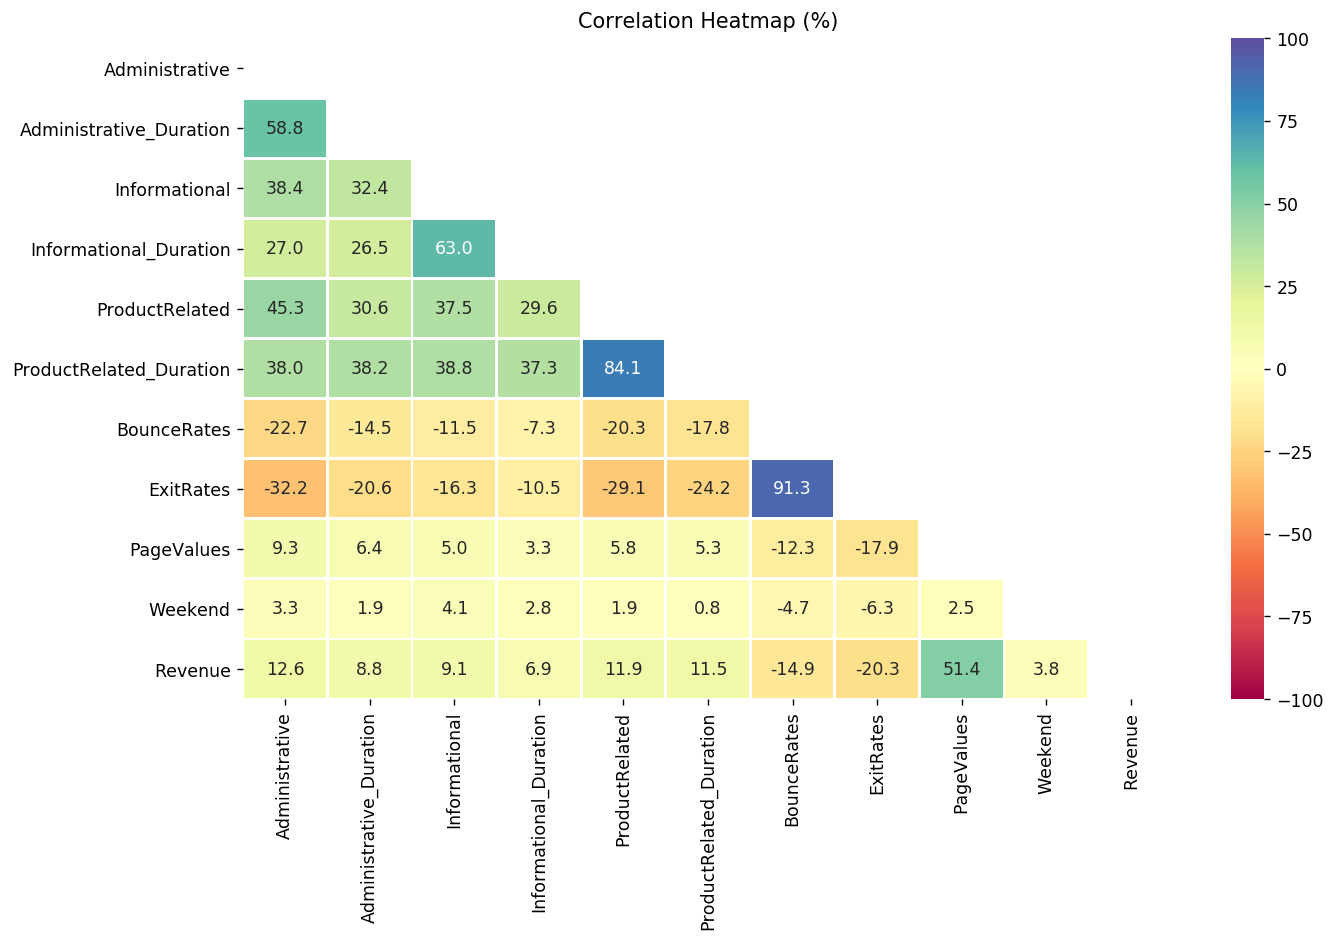

In [24]:
plt.figure(dpi = 125,figsize= (12,7))
# plt.style.use('fivethirtyeight')
mask = np.triu(np.ones_like(df_viz.corr(),dtype = bool))
sns.heatmap(df_viz.corr()*100,
             mask = mask,
            fmt = ".1f",
            annot=True,
            lw=1,
            cmap = 'Spectral',
            vmin=-100, vmax=100 #correlation in percentage 
           )
# plt.xlabel(size=12, labelpad=15)
# plt.ylabel(size=12, labelpad=15)    
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap (%)')

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('01.Correlation.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

Some unique insights:<br>
- BounceRate and ExitRate have a very high correlation number.
- Revenue has positive high correlation with PageValues, and negative high correlation with ExitRates and BounceRates

## 2.3 Record by Month

We plot the monthly activity and it's 

In [27]:
df_viz['Month'] = df_viz['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                  [1,2,3,4,5,6,7,8,9,10,11,12])

In [28]:
group1_hue = df_viz.groupby(['Month','Revenue'])['Region'].count().reset_index()
# group1_hue['Month'] = group1_hue['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
#                                   [1,2,3,4,5,6,7,8,9,10,11,12])
group1_hue.columns = ['Month','Revenue','Count']
group1_hue['Perc'] = group1_hue['Count']/group1_hue['Count'].sum()*100
group1_hue = group1_hue.append([{'Month': 1,'Revenue':1},
                        {'Month': 1,'Revenue':0},
                        {'Month': 4,'Revenue':1},
                        {'Month': 4,'Revenue':0}
                       ], ignore_index=True).reset_index().drop(columns='index')
group1_hue['Revenue'] = group1_hue['Revenue'].replace([1,0], [True, False])
group1_hue = group1_hue.fillna(0)


group1 = group1_hue.groupby(['Month'])[['Count','Perc']].sum().reset_index()
group1

group1_hue.head(5)

,Month,Revenue,Count,Perc
0,2,False,181.0,1.812538
1,2,True,3.0,0.030042
2,3,False,1702.0,17.043861
3,3,True,192.0,1.922692
4,5,False,2998.0,30.022031


In [29]:
color_general = '#004474'
color1 ='#f44242' #blue
color2 = '#4874bf' #red
color3 = '#fbc41b' #yellow
color4 = '#00bfa5' #green
color5 = '#1b998b' #darkgreen
color6 = '#5e72d4' #blueoke

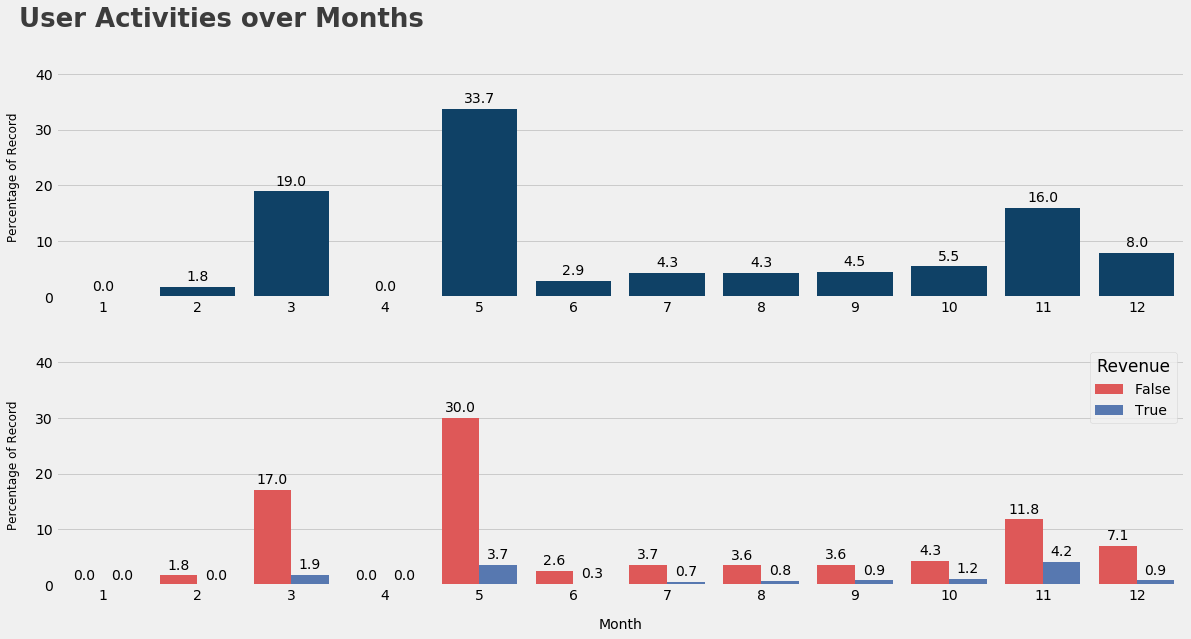

In [30]:
style.use('fivethirtyeight')

plt.figure(figsize=(18,14))
plt.subplot(3,1,1)

feature = 'Month'
x_label = 'Month'
graph1 = sns.barplot(x=feature, y = 'Perc', data=group1,
                    color=color_general)
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=1),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)

plt.xlabel('', size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 12, labelpad=15)    
plt.ylim(ymax=43)


plt.subplot(3,1,2)
graph2 = sns.barplot(x=feature, y='Perc', hue='Revenue', data=group1_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=1),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel(x_label, size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 12, labelpad=15)    
plt.ylim(ymax=43)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})


#DECORATING
plt.text(x = -0.9, y = 100, s = "User Activities over Months",
               fontsize = 26, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.MonthlyActivity.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()


<Figure size 144x576 with 0 Axes>

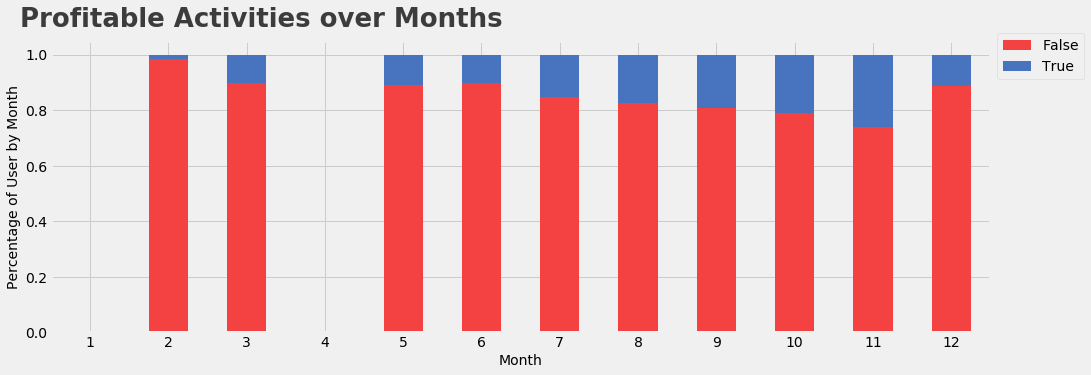

In [31]:
plt.figure(figsize=(2,8))
style.use('fivethirtyeight')

perc = pd.crosstab(df_viz[feature], df_viz['Revenue']).reset_index()
perc.columns = ['Month', 'False', 'True']
perc = perc.append([{'Month':1, 'True':0, 'False':0},
                    {'Month':4, 'True':0, 'False':0}], ignore_index=True)
perc = perc.sort_values(by='Month', ascending=True)
perc = perc.set_index('Month')

perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (15, 5),
                                                   color = [color1, color2],
                                                  rot=0)
plt.ylabel('Percentage of User by Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
# plt.title('Profitable User by Month (%)', fontsize = 15)
#Decorating
plt.legend(loc='best',
           bbox_to_anchor=(1., 1.05)
          )
plt.text(x = -0.9, y = 1.1, s = "Profitable Activities over Months",
               fontsize = 26, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.MonthlyAct2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()


- From above graphs related to the monthly activity, we can see the percentage revenue increases over second semester (from July-November).
- Although the highest activity occur on May, the percentage profitable activity on that month isn't the highest

## 2.4 Visitor Type

In [181]:
group2_hue = df_viz.groupby(['VisitorType','Revenue'])['Region'].count().reset_index()
group2_hue.columns = ['VisitorType','Revenue','Count']
group2_hue = group2_hue.sort_values(by='Count', ascending=False)
group2_hue['Perc'] = group2_hue['Count']/group2_hue['Count'].sum()*100
group2_hue = group2_hue.fillna(0)

group2 = group2_hue.groupby(['VisitorType'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

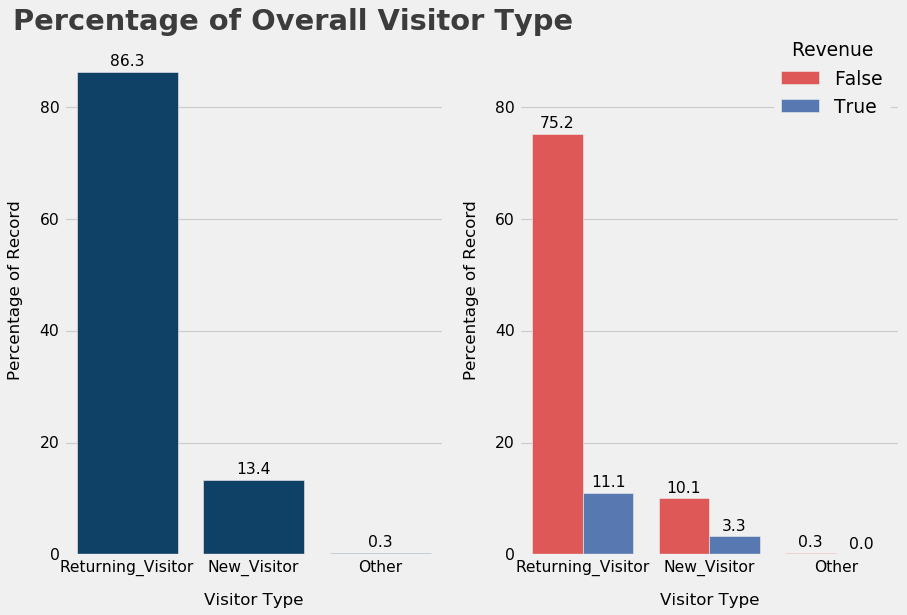

In [182]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)

graph1 = sns.barplot(x='VisitorType', y = 'Perc', data=group2,
                    color=color_general)
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=1),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)

plt.xlabel('Visitor Type', size=15, labelpad=15)
plt.ylabel('Percentage of Record', size= 15, labelpad=15)    
plt.ylim(ymax=95)
# plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})


plt.subplot(1,2,2)
graph2 = sns.barplot(x='VisitorType', y='Perc', hue='Revenue', data=group2_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=1),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel('Visitor Type', size=15, labelpad=15)
plt.ylabel('Percentage of Record', size= 15, labelpad=15)    
plt.ylim(ymax=95)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})
plt.text(x = -4.5, y = 94, s = "Percentage of Overall Visitor Type",
               fontsize = 26, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.VisitorType.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()


<Figure size 400x560 with 0 Axes>

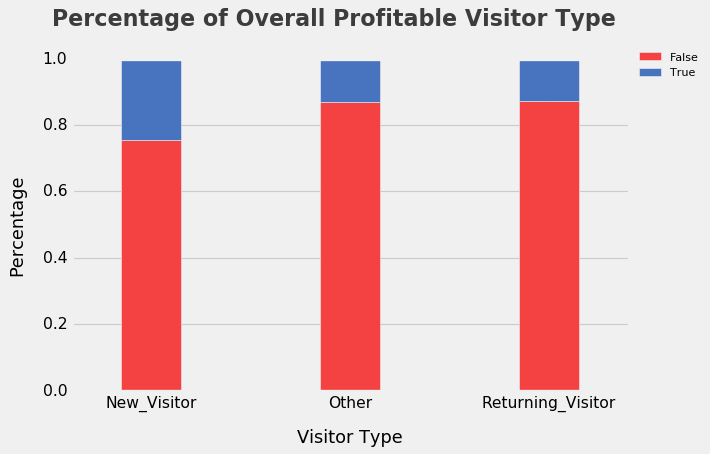

In [192]:
plt.figure(figsize=(5,7))
plt.style.use('fivethirtyeight')

perc = pd.crosstab(df_viz['VisitorType'], df_viz['Revenue'])
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (8, 5),
                                                   color = [color1, color2],
                                                  rot=0,
                                                  width=0.3)
# plt.title('Visitor Type vs Revenue', fontsize = 15)
plt.ylabel('Percentage', fontsize=16, labelpad=15)
plt.xlabel('Visitor Type', fontsize=16, labelpad=15)

plt.legend(loc='best',
           bbox_to_anchor=(1., 1.05),
          prop={'size': 10})
plt.text(x = -0.5, y = 1.1, s = "Percentage of Overall Profitable Visitor Type",
               fontsize = 20, weight = 'bold', alpha = .75)
# Bolded horizontal line at y=0
plt.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.VisitorType2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

In [193]:
group3 = pd.crosstab(df_viz['Month'], df_viz['VisitorType']).reset_index()
group3.columns = ['Month','New_Visitor','Other','Returning_Visitor']
group3 = group3.append([{'Month':1},
                    {'Month':4}], ignore_index=True)
group3 = group3.fillna(0)
group3 = group3.sort_values(by='Month', ascending=True)
group3 = group3.set_index('Month')

group3

,New_Visitor,Other,Returning_Visitor
Month,,,
1,0.0,0.0,0.0
2,1.0,0.0,183.0
3,232.0,0.0,1662.0
4,0.0,0.0,0.0
5,319.0,0.0,3044.0
6,30.0,1.0,257.0
7,54.0,0.0,378.0
8,72.0,0.0,361.0
9,108.0,0.0,340.0


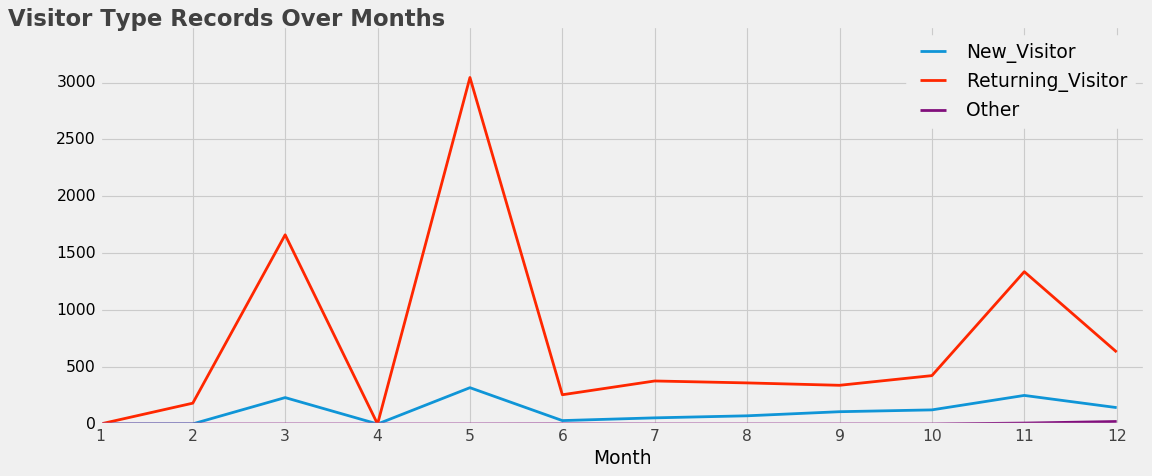

In [194]:
# Setting FiveThirtyEight style
# plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(15,6))
    
# Plotting each occupation category
ax1 = sns.lineplot(x=group3.index, y=group3['New_Visitor'].tolist(), color='#0F95D7', lw=2.5)
ax2 = sns.lineplot(x=group3.index, y=group3['Returning_Visitor'].tolist(), color='#FF2700', lw=2.5)
ax3 = sns.lineplot(x=group3.index, y=group3['Other'].tolist(), color='#810F7C', lw=2.5)


# # DECORATING
ax.legend(['New_Visitor','Returning_Visitor','Other'], loc='upper right')

# Bolded horizontal line at y=0
ax1.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# # Y-labels to only these
ax.set_yticks(np.arange(0,3100,500))
# ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='#414141')

# # X-labels and changing label names
ax.set_xticks(np.arange(1,12.5,1))
ax.set_xticklabels(np.arange(1,13,1), fontsize=14, color='#414141')

# # Title text
ax.text(x=0.0, y=3500, s="Visitor Type Records Over Months",
        fontsize=20.5, fontweight='semibold', color='#414141')

# # Subtitle text
# ax.text(x=0, y=3300, s='Subtitle Text', fontsize=16.5, color='#414141')

# # Line at bottom for signature line
# ax1.text(x = 1996.7, y = -18.5,
#     s = '   ©Carlos Gutierrez  Source: FiveThirtyEight   ',
#     fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');
# plt.legend(loc='upper right',
#            prop={'size': 10})
plt.xlim(xmin=1, xmax=12.3)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.MonthlyVisitorType.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

The peak activities on March, May, and November were consist of the increament both from new visitors and returning visitors.

<Figure size 160x640 with 0 Axes>

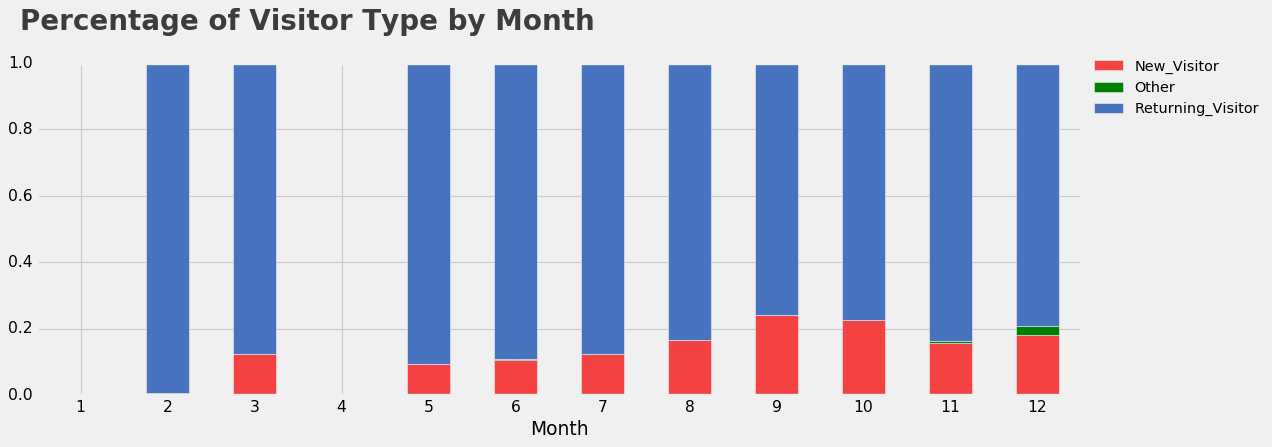

In [195]:
plt.figure(figsize=(2,8))

perc = pd.crosstab(df_viz['Month'], df_viz['VisitorType']).reset_index()
perc = perc.append([{'Month':1},
                    {'Month':4}], ignore_index=True)
perc = perc.fillna(0)
perc = perc.sort_values(by='Month', ascending=True)
perc = perc.set_index('Month')
perc

perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (15, 5),
                                                   color = [color1, 'green', color2],
                                                  rot=0)
plt.text(x = -0.7, y = 1.1, s = "Percentage of Visitor Type by Month",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.legend(loc='best',
           bbox_to_anchor=(1., 1.05),
          prop={'size': 13})

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('02.MonthlyVisitorType2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()


- The percentage of user that accessed the website monthly dominated by the returning visitor (around 80%-90%)

## 2.5 Region

In [196]:
group3_hue = df_viz.groupby(['Region','Revenue'])['Month'].count().reset_index()
group3_hue.columns = ['Region','Revenue','Count']
group3_hue = group3_hue.sort_values(by='Count', ascending=False)
group3_hue['Perc'] = group3_hue['Count']/group3_hue['Count'].sum()*100
group3_hue = group3_hue.fillna(0)

group3 = group3_hue.groupby(['Region'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

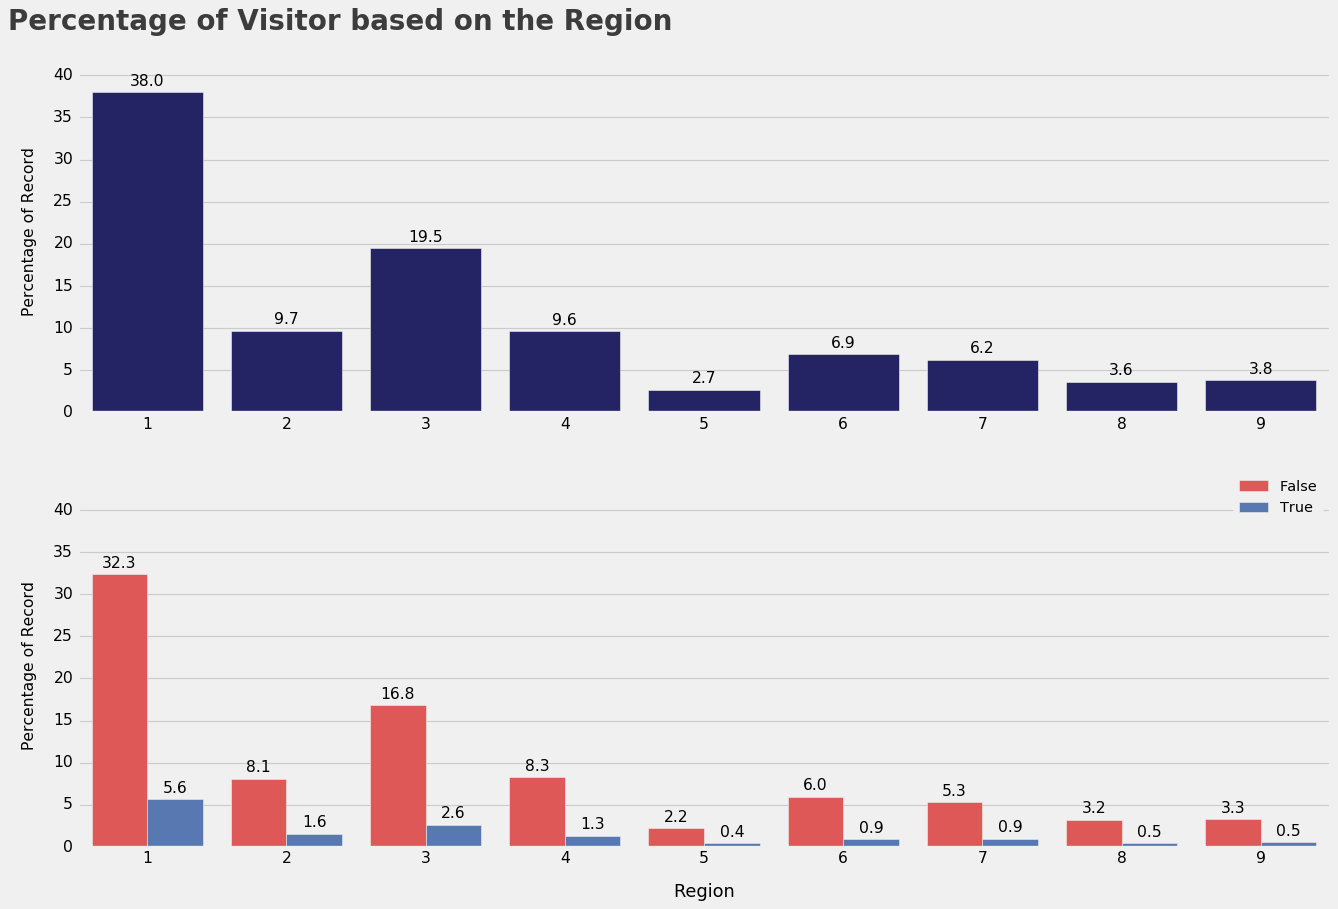

In [197]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)

feature = 'Region'
x_label = 'Region'
graph1 = sns.barplot(x=feature, y = 'Perc', data=group3,
                    color='midnightblue')
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=1),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)

plt.xlabel('', size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=43)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})


plt.subplot(2,1,2)
graph2 = sns.barplot(x=feature, y='Perc', hue='Revenue', data=group3_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=1),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel('Region', size=16, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=43)
plt.legend(loc='best',
           bbox_to_anchor=(1., 1.05),
          prop={'size': 13})
plt.text(x = -1, y = 97, s = "Percentage of Visitor based on the Region",
               fontsize = 25, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('04.Region1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()


In [198]:
data['VisitorType'].value_counts(normalize=True)*100

Returning_Visitor    85.554202
New_Visitor          13.755583
Other                 0.690215
Name: VisitorType, dtype: float64

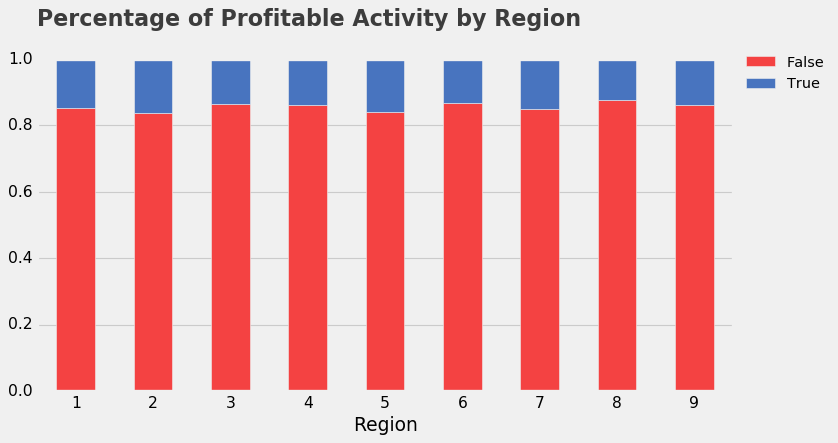

In [199]:
perc = pd.crosstab(df_viz['Region'], df_viz['Revenue'])
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (10, 5),
                                                   color = [color1, color2],
                                                  rot=0)
plt.legend(loc='best', bbox_to_anchor=(1., 1.05),
           prop={'size': 13}
          )
plt.text(x = -0.5, y = 1.1, s = "Percentage of Profitable Activity by Region",
               fontsize = 20, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('04.Region2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

## 2.6 Traffic Type

In [200]:
group4_hue = df_viz.groupby(['TrafficType','Revenue'])['Region'].count().reset_index()
group4_hue.columns = ['TrafficType','Revenue','Count']
group4_hue = group4_hue.sort_values(by='Count', ascending=False)
group4_hue['Perc'] = group4_hue['Count']/group4_hue['Count'].sum()*100
group4_hue = group4_hue.fillna(0)

group4 = group4_hue.groupby(['TrafficType'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

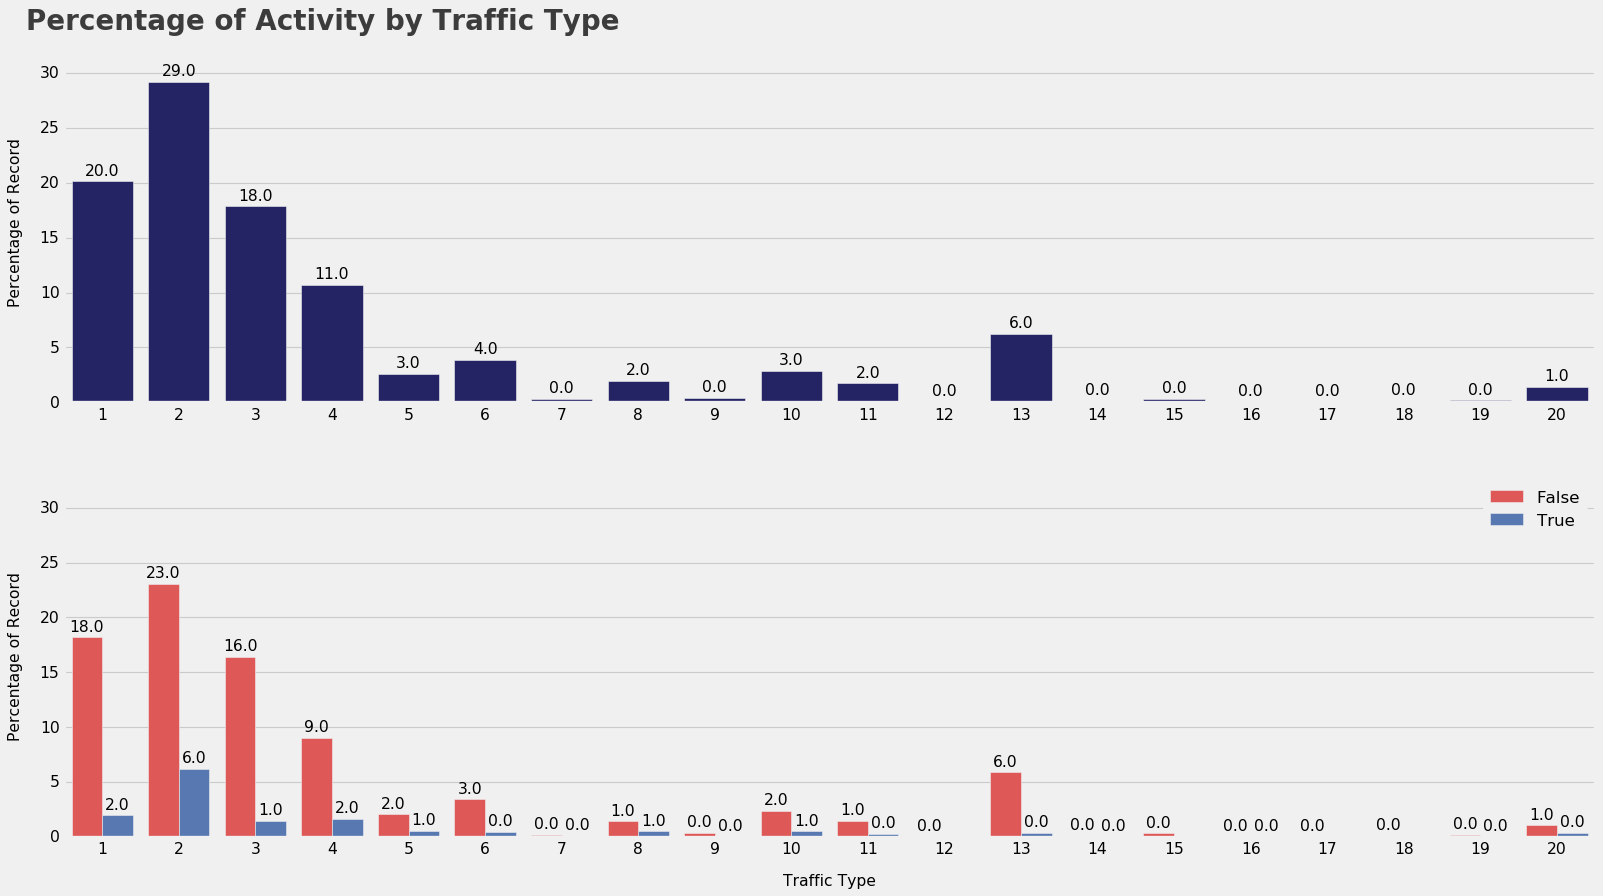

In [201]:
plt.figure(figsize=(22,12))
plt.subplot(2,1,1)

feature = 'TrafficType'
x_label = 'Traffic Type'
graph1 = sns.barplot(x=feature, y = 'Perc', data=group4,
                    color='midnightblue')
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=0),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)


plt.text(x = -1, y = 34, s = "Percentage of Activity by Traffic Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('', size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=33)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})


plt.subplot(2,1,2)
graph2 = sns.barplot(x=feature, y='Perc', hue='Revenue', data=group4_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=0),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel(x_label, size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=33)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05),
          prop={'size': 15})


#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('05.TrafficType1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()


<Figure size 1600x640 with 0 Axes>

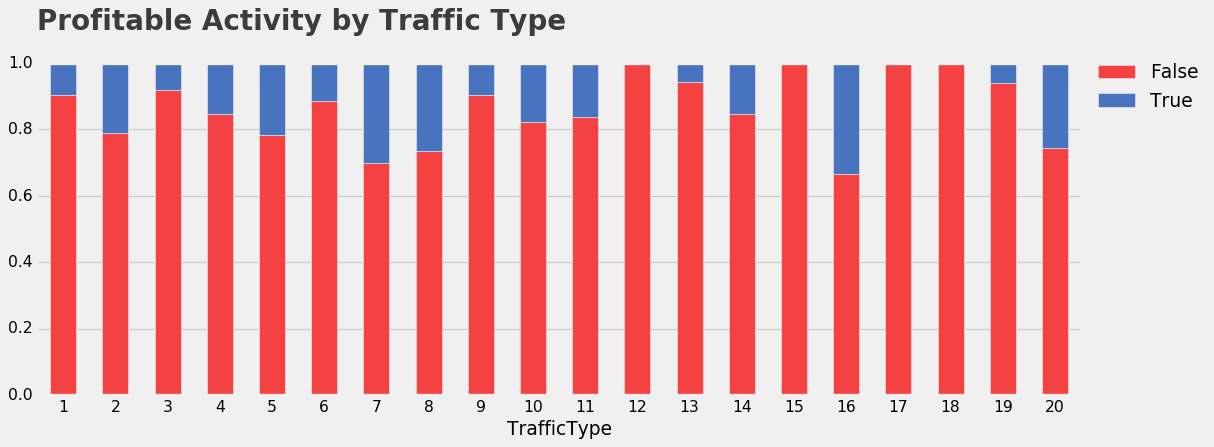

In [202]:
perc = pd.crosstab(df_viz['TrafficType'], df_viz['Revenue'])

plt.figure(figsize=(20,8))
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (15, 5),
                                                   color = [color1, color2],
                                                  rot=0)
plt.legend(loc='best', bbox_to_anchor=(1., 1.05))
plt.text(x = -0.5, y = 1.1, s = "Profitable Activity by Traffic Type",
               fontsize = 25, weight = 'bold', alpha = .75)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('05.TrafficType2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

- Most activities are categorized from traffic type 1-4.
- User from traffic 2 and 4 tend to have relatively a slightly better revenue percentage, along with higher activities

## 2.7 Operating System

In [203]:
group6_hue = df_viz.groupby(['OperatingSystems','Revenue'])['Region'].count().reset_index()
group6_hue.columns = ['OperatingSystems','Revenue','Count']
group6_hue = group6_hue.sort_values(by='Count', ascending=False)
group6_hue['Perc'] = group6_hue['Count']/group6_hue['Count'].sum()*100
group6_hue = group6_hue.fillna(0)

group6 = group6_hue.groupby(['OperatingSystems'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

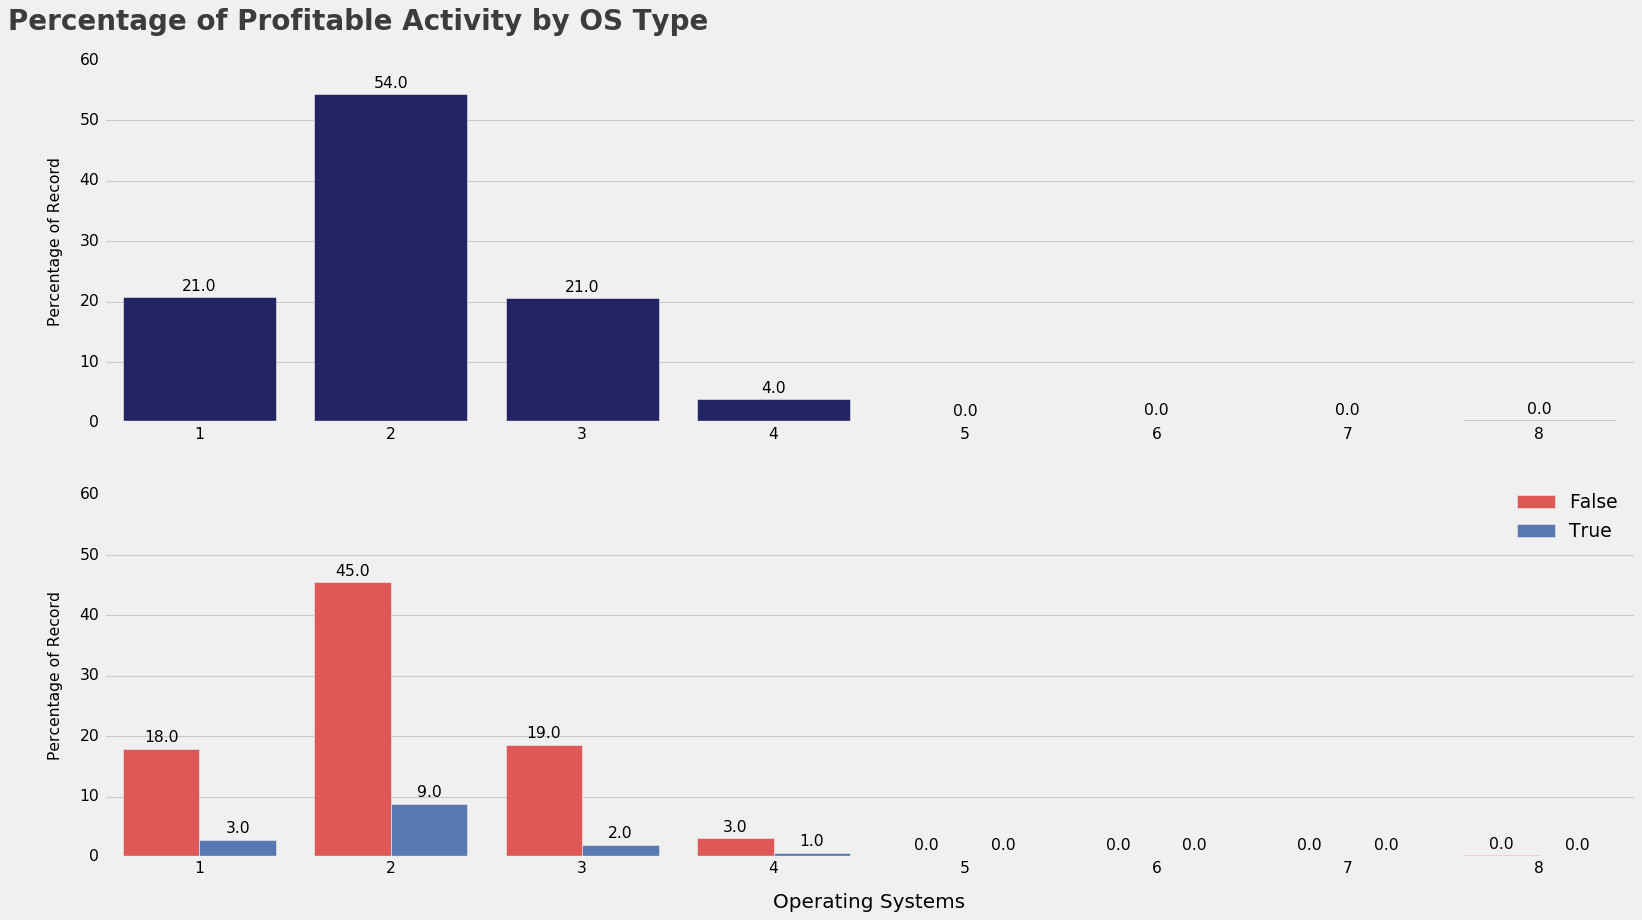

In [204]:
plt.figure(figsize=(22,12))
plt.subplot(2,1,1)

feature = 'OperatingSystems'
x_label = 'Operating Systems'
graph1 = sns.barplot(x=feature, y = 'Perc', data=group6,
                    color='midnightblue')
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=0),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)

plt.text(x = -1, y = 65, s = "Percentage of Profitable Activity by OS Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('', size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=60)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})


plt.subplot(2,1,2)
graph2 = sns.barplot(x=feature, y='Perc', hue='Revenue', data=group6_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=0),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel(x_label, size=18, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=60)
plt.legend(loc='best', bbox_to_anchor=(1., 1.05))

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('06.OSType1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight', prop={'size': 15})


plt.show()


<Figure size 1600x640 with 0 Axes>

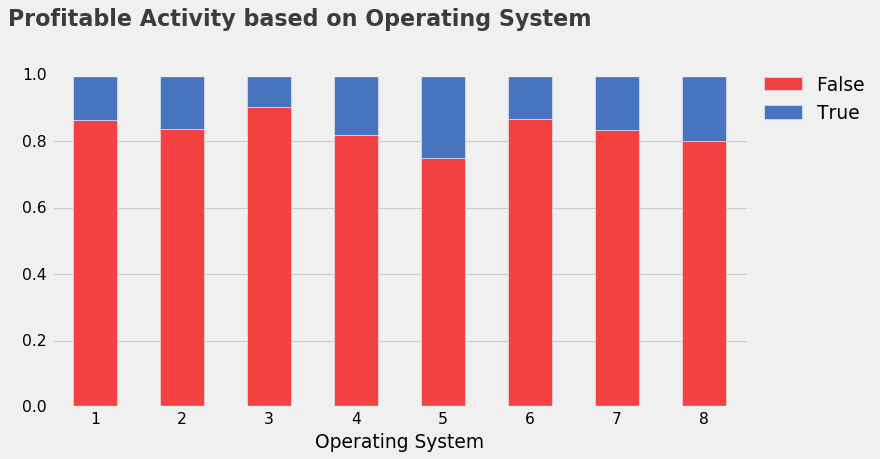

In [206]:
perc = pd.crosstab(df_viz['OperatingSystems'], df_viz['Revenue'])

plt.figure(figsize=(20,8))
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (10, 5),
                                                   color = [color1, color2],
                                                  rot=0)

plt.legend(loc='best', bbox_to_anchor=(1., 1.05))
plt.text(x = -1, y = 1.15, s = "Profitable Activity based on Operating System",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.xlabel('Operating System')

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('06.OSType2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

## 2.8 Browser

In [207]:
group7_hue = df_viz.groupby(['Browser','Revenue'])['Region'].count().reset_index()
group7_hue.columns = ['Browser','Revenue','Count']
group7_hue = group7_hue.sort_values(by='Count', ascending=False)
group7_hue['Perc'] = group7_hue['Count']/group7_hue['Count'].sum()*100
group7_hue = group7_hue.fillna(0)

group7 = group7_hue.groupby(['Browser'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

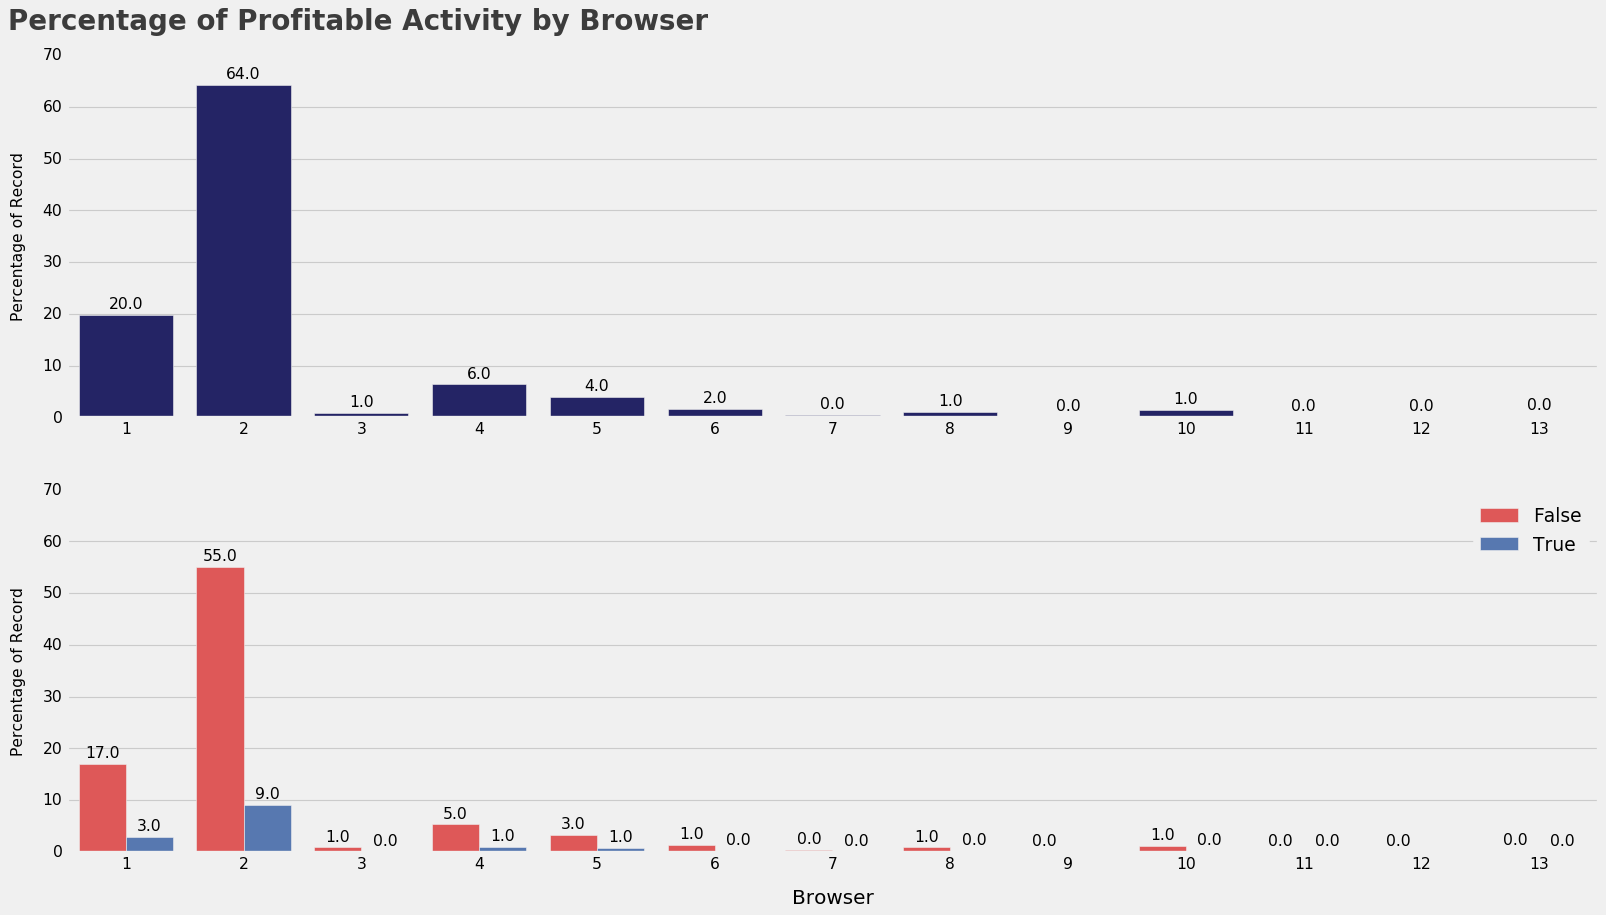

In [208]:
plt.figure(figsize=(22,12))
plt.subplot(2,1,1)

feature = 'Browser'
x_label = 'Browser'
graph1 = sns.barplot(x=feature, y = 'Perc', data=group7,
                    color='midnightblue')
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(),decimals=0),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)

plt.xlabel('', size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=70)
#plt.legend(['Not Profit', 'Profit'], loc='upper right', prop={'size': 12})
plt.text(x = -1, y = 75, s = "Percentage of Profitable Activity by Browser",
               fontsize = 25, weight = 'bold', alpha = .75)

plt.subplot(2,1,2)
graph2 = sns.barplot(x=feature, y='Perc', hue='Revenue', data=group7_hue, palette=[color1,color2])

for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=0),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel(x_label, size=18, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=70)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('07.Browser1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()


<Figure size 1600x640 with 0 Axes>

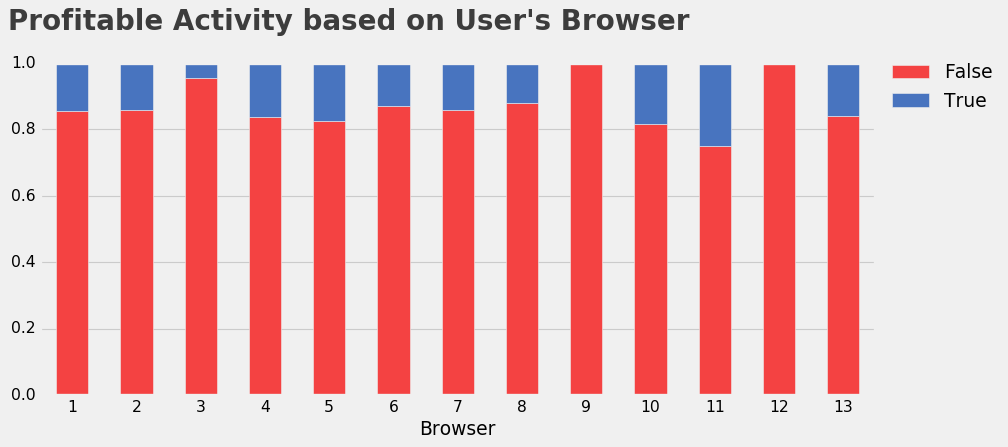

In [210]:
perc = pd.crosstab(df_viz['Browser'], df_viz['Revenue'])

plt.figure(figsize=(20,8))
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (12, 5),
                                                   color = [color1, color2],
                                                  rot=0)
# plt.title('Profitable Activity based on Browser (%)', fontsize = 15)
plt.text(x = -1, y = 1.1, s = "Profitable Activity based on User's Browser",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.legend(loc='best', bbox_to_anchor=(1., 1.05))


#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('07.Browser2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

## 2.9 Weekend & Special Day Activities

In [211]:
group5_hue = df_viz.groupby(['Weekend','Revenue'])['Region'].count().reset_index()
group5_hue.columns = ['Weekend','Revenue','Count']
group5_hue = group5_hue.sort_values(by='Count', ascending=False)
group5_hue['Perc'] = group5_hue['Count']/group5_hue['Count'].sum()*100
group5_hue = group5_hue.fillna(0)

# group5 = group5_hue.groupby(['Region'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

In [212]:
group5_hue

,Weekend,Revenue,Count,Perc
0,False,False,6637,66.463048
2,True,False,1909,19.116763
1,False,True,1052,10.534749
3,True,True,388,3.885440


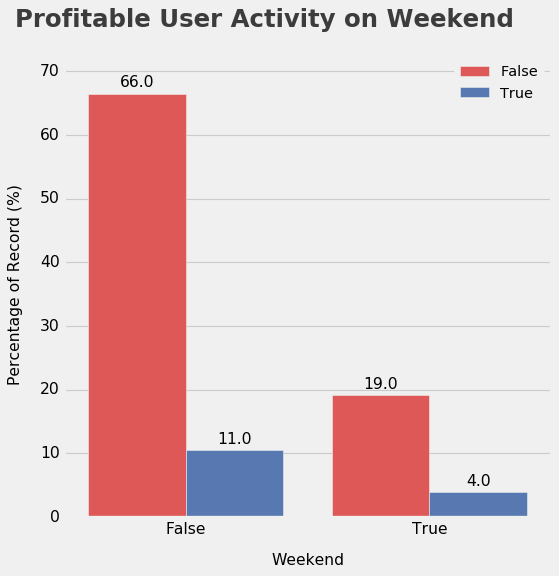

In [226]:
plt.figure(figsize=(7,7))

x_label='Weekend'

# plt.subplot(1,2,1)

graph2 = sns.barplot(x='Weekend', y='Perc', hue='Revenue', data=group5_hue, palette=[color1,color2])
for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=0),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),
                    textcoords='offset points',color='black',size=14)
    
plt.xlabel(x_label, size=14, labelpad=15)
plt.ylabel('Percentage of Record (%)', size= 14, labelpad=15)    
plt.ylim(ymax=73)
plt.text(x = -0.7, y = 77, s = "Profitable User Activity on Weekend",
               fontsize = 22, weight = 'bold', alpha = .75)

plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          prop={'size': 13})


#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('08.Weekend1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

<Figure size 800x640 with 0 Axes>

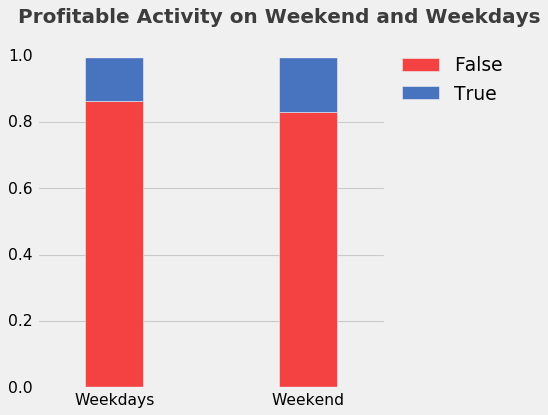

In [379]:
perc = pd.crosstab(df_viz['Weekend'], df_viz['Revenue'])
perc.index = ['Weekdays', 'Weekend']
style.use('fivethirtyeight')

plt.figure(figsize=(10,8))
perc.div(perc.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                   stacked = True, figsize = (5, 5),
                                                   color = [color1, color2],
                                                  rot=0,
                                                  width=0.3
                                                  )

plt.legend(loc='best', bbox_to_anchor=(1., 1.05))
plt.text(x = -0.5, y = 1.1, s = "Profitable Activity on Weekend and Weekdays",
               fontsize = 18, weight = 'bold', alpha = .75, label=['Weekdays', 'Weekend'])
# plt.xlabel('Weekend')

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('08.Weekend2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

In [240]:
print('Percentage of Profitable Activities on Weekend: ',
      round(group5_hue[(group5_hue['Weekend']==True)&(group5_hue['Revenue']==True)]['Perc'].sum()/group5_hue[group5_hue['Weekend']==True]['Perc'].sum(),5)*100,
      '%')
print('Percentage of Profitable Activities on Weekdays: ',
      round(group5_hue[(group5_hue['Weekend']==False)&(group5_hue['Revenue']==True)]['Perc'].sum()/group5_hue[group5_hue['Weekend']==False]['Perc'].sum(),5)*100,
      '%')

Percentage of Profitable Activities on Weekend:  16.892 %
Percentage of Profitable Activities on Weekdays:  13.682 %


In [241]:
print('Percentage of Weekend Activities/Weekday Activities:', round(group5_hue[group5_hue['Weekend']==True]['Count'].sum()/group5_hue[group5_hue['Weekend']==False]['Count'].sum(),3)*100, '%')
print('Percentage of Available Weekend days/Available Weekdays:', round(2/5,1)*100, '%')

Percentage of Weekend Activities/Weekday Activities: 29.9 %
Percentage of Available Weekend days/Available Weekdays: 40.0 %


- Weekend doesn't give much impact on website activities since the percentage of weekend activity is relatively the same with available weekend/available weekday
- The percentage of profitable activities on weekend tend to be higher than the activities on weekdays. This result also match with the correlation between revenue and weekend variable (although the correlation is relatively low)

In [242]:
group5b_hue = df_viz.groupby(['SpecialDay','Revenue'])['Region'].count().reset_index()
group5b_hue.columns = ['SpecialDay','Revenue','Count']
group5b_hue = group5b_hue.sort_values(by='Count', ascending=False)
group5b_hue['Perc'] = group5b_hue['Count']/group5b_hue['Count'].sum()*100
group5b_hue = group5b_hue.fillna(0)

# group5 = group5_hue.groupby(['Region'])[['Count','Perc']].sum().reset_index().sort_values(by='Count', ascending=False)

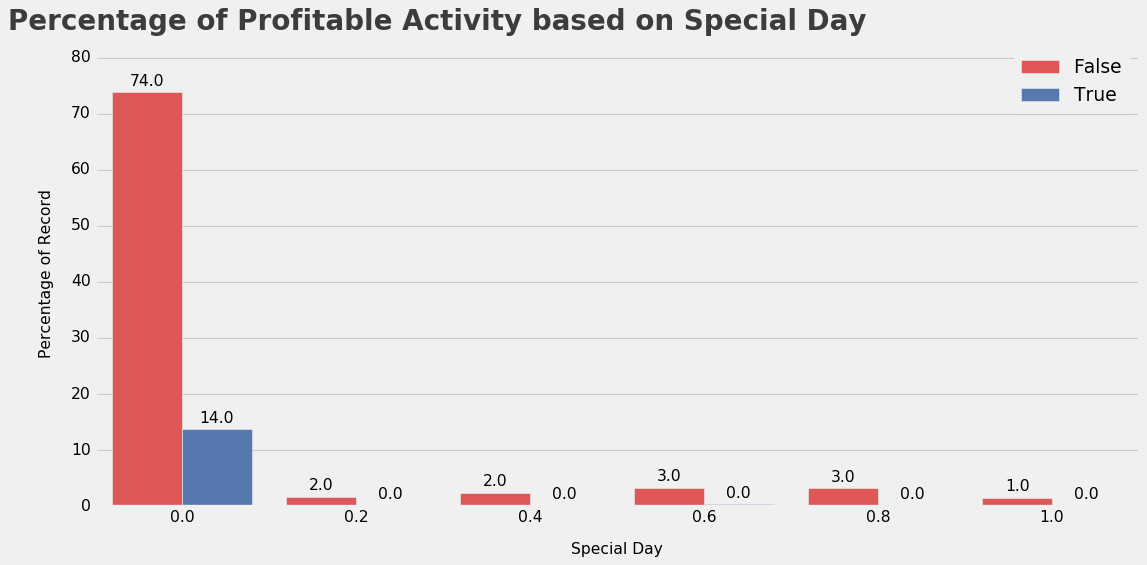

In [243]:
plt.figure(figsize=(15,7))

x_label='Special Day'

# plt.subplot(1,2,1)

graph2 = sns.barplot(x='SpecialDay', y='Perc', hue='Revenue', data=group5b_hue, palette=[color1,color2])
for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(),decimals=0),
                               (p.get_x()+p.get_width()/2.,p.get_height()),
                               ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=14)
plt.xlabel(x_label, size=14, labelpad=15)
plt.ylabel('Percentage of Record', size= 14, labelpad=15)    
plt.ylim(ymax=83)
plt.text(x = -1, y = 85, s = "Percentage of Profitable Activity based on Special Day",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('08.SpecialDay.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

In [244]:
df_viz['SpecialDay'].value_counts()

0.0    8735
0.6     351
0.8     325
0.4     243
0.2     178
1.0     154
Name: SpecialDay, dtype: int64

In [245]:
group_5c = df_viz.groupby(['Month']).agg({'SpecialDay': ['sum','count']
                                         }).droplevel(level=0, axis=1).reset_index()
group_5c['perc'] = group_5c['sum']/group_5c['count']*100
group_5c

,Month,sum,count,perc
0,2,43.0,184,23.369565
1,3,0.0,1894,0.000000
2,5,714.4,3363,21.242938
3,6,0.0,288,0.000000
4,7,0.0,432,0.000000
5,8,0.0,433,0.000000
6,9,0.0,448,0.000000
7,10,0.0,549,0.000000
8,11,0.0,1597,0.000000
9,12,0.0,798,0.000000


## 2.10 Bounce Rate, Exit Rate and Page Values

### 2.10.1 Feature Distribution Over Different Type of Visitors

#### Bounce Rate Over Different Type of Visitor

No handles with labels found to put in legend.


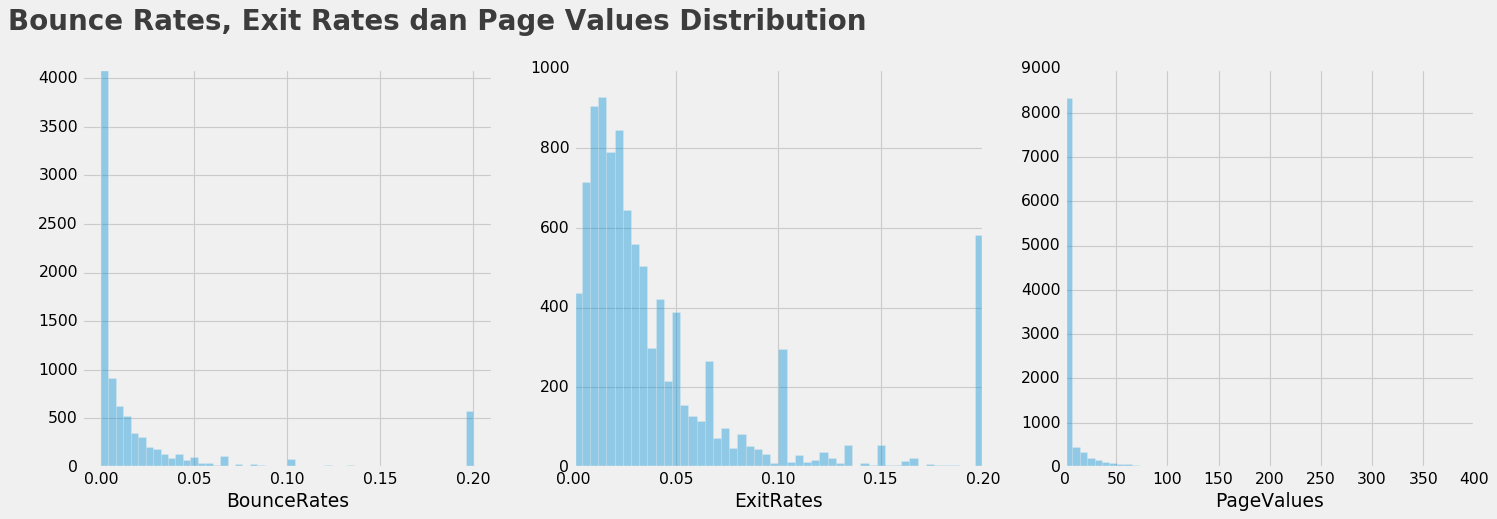

In [252]:
plt.figure(figsize=(20,6))

feature=['BounceRates', 'ExitRates', 'PageValues']
x_max = 0.21
x_min = -0.01
y_max = 4100
y_min = 0
nx = 1
ny = 3

plt.subplot(nx,ny,1)
sns.distplot(df_viz[feature[0]], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel(feature[0])
plt.text(x = -0.05, y = 4500, s = "Bounce Rates, Exit Rates dan Page Values Distribution",
               fontsize = 25, weight = 'bold', alpha = .75)

plt.subplot(nx,ny,2)
sns.distplot(df_viz[feature[1]], kde=False)
plt.xlabel(feature[1])

plt.subplot(nx,ny,3)
sns.distplot(df_viz[feature[2]], kde=False)
plt.xlabel(feature[2])


#Decorating
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('09.BounceExitPageValues.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

No handles with labels found to put in legend.


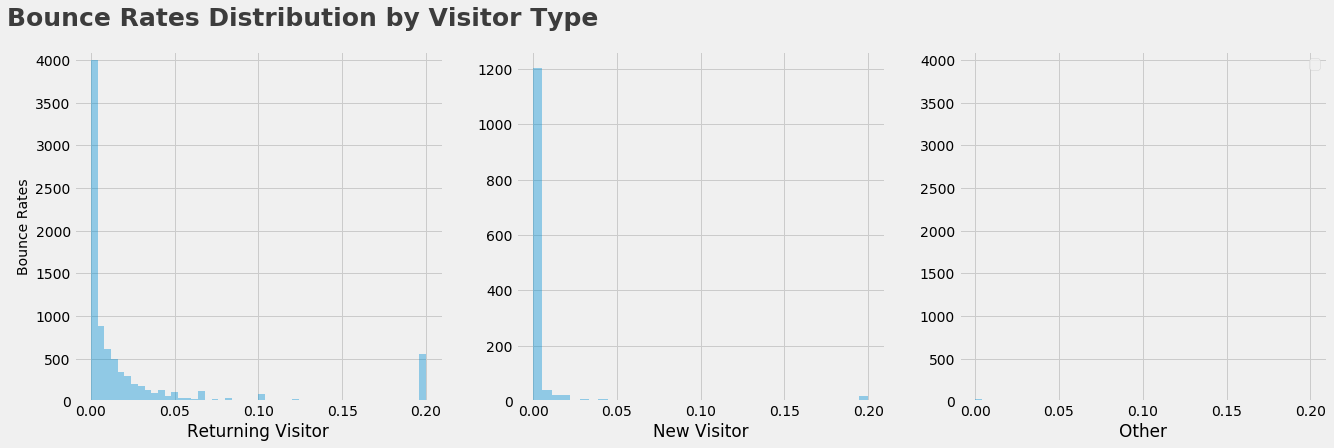

In [38]:
plt.figure(figsize=(20,6))

feature='BounceRates'
x_max = 0.21
x_min = -0.01
y_max = 4100
y_min = 0
nx = 1
ny = 3

plt.subplot(nx,ny,1)
sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel('Returning Visitor')
plt.ylabel('Bounce Rates', size=14)
plt.text(x = -0.05, y = 4400, s = "Bounce Rates Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)

plt.subplot(nx,ny,2)
sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
# plt.xlim(xmin=x_min, xmax=x_max)
# plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel('New Visitor')

plt.subplot(nx,ny,3)
sns.distplot(df_viz[(df_viz['VisitorType']=='Other')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
plt.xlabel('Other')


#Decorating
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('09.BounceRates_Visitor.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

#### Exit Rate Over Different Type of Visitor

No handles with labels found to put in legend.


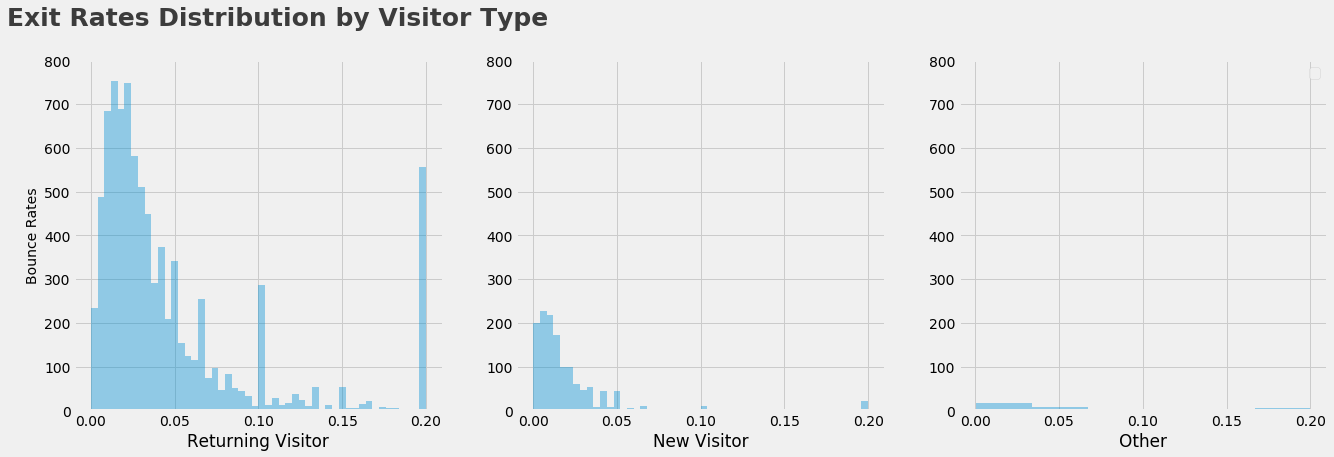

In [69]:
plt.figure(figsize=(20,6))


feature='ExitRates'
x_max = 0.21
x_min = -0.01
y_max = 800
y_min = 0
nx = 1
ny = 3

plt.subplot(nx,ny,1)
sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel('Returning Visitor')
plt.ylabel('Bounce Rates', size=14)
plt.text(x = -0.05, y = 880, s = "Exit Rates Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)

plt.subplot(nx,ny,2)
sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
plt.xlabel('New Visitor')

plt.subplot(nx,ny,3)
sns.distplot(df_viz[(df_viz['VisitorType']=='Other')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
plt.xlabel('Other')


#Decorating
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('10.ExitRates_Visitor.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

#### PageValues Over Different Type of Visitors

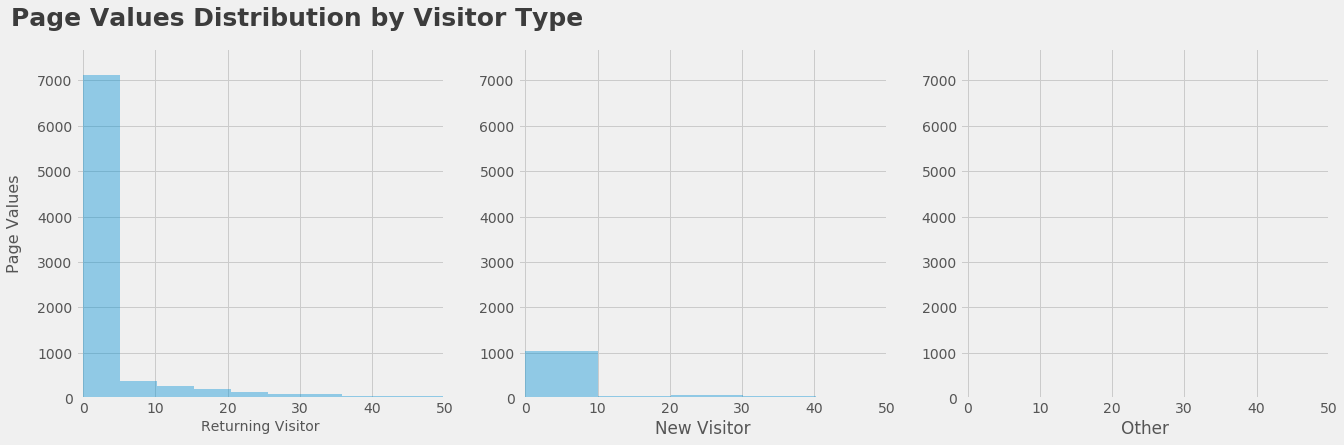

In [296]:
plt.figure(figsize=(20,6))

feature = 'PageValues'
x_max = 50
x_min = -1
y_max = 7700
y_min = 0

plt.subplot(1,3,1)
sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Returning_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel('Returning Visitor', size=14)
plt.ylabel('Page Values', size=16, labelpad=15)
plt.text(x = -10, y = 8200, s = "Page Values Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)

plt.subplot(1,3,2)
sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='New_Visitor')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
# plt.xlabel('')
plt.xlabel('New Visitor')

plt.subplot(1,3,3)
sns.distplot(df_viz[(df_viz['VisitorType']=='Other')][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==True)][feature], kde=False)
# sns.distplot(df_viz[(df_viz['VisitorType']=='Other')&(df_viz['Revenue']==False)][feature], kde=False)
plt.xlim(xmin=x_min, xmax=x_max)
plt.ylim(ymin=y_min, ymax=y_max)
plt.xlabel('Other')

# plt.legend(loc='best', bbox_to_anchor=(1., 1.05))

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('11.PageValues_VisitorType.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')



plt.show()

The returning customer tend to have higher value of PageValues than the New Visitor

### 2.10.2 Bounce Rate vs Exit Rate

<Figure size 10800x7200 with 0 Axes>

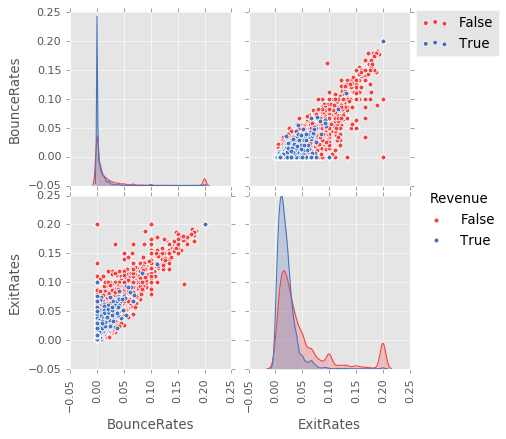

In [73]:
plt.figure(figsize=(150,100))
style.use('classic')
style.use('ggplot')

g = sns.pairplot(df_viz,
                 x_vars=['BounceRates','ExitRates'],
                 y_vars=['BounceRates','ExitRates'],
                 hue='Revenue',diag_kind='kde',
                palette=[color1,color2])

plt.legend(loc='best',
           bbox_to_anchor=(1., 1.05)
          )
plt.xticks(size=12)
# g.set_xticklabels(rotation=45)
g.fig.draw(
    g.fig.canvas.get_renderer()
)  # required, as matplotlib calculates ticks during draw time
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('13.ExitBouncePairPlot.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

In [74]:
check = df_viz[df_viz['ExitRates']>0.025]
check = check[check['BounceRates']>0.025]
check = check[check['Revenue']==True]

check['VisitorType'].value_counts()

Returning_Visitor    46
New_Visitor           1
Name: VisitorType, dtype: int64

- From above pairplot graphs, we can see visitors whose activities resulted revenue tend to have lower exit rates and bounce rates
- The positive revenue with high exit rates and bounce rates (> 0.025) came from the returning customer. This might be because the returning customer had already conducted research over product that the visitor wanted before.

## 2.10 Duration

In [75]:
df_viz['ProductRelated_Duration'] = df_viz['ProductRelated_Duration'].replace(-1,0)
df_viz['Informational_Duration'] = df_viz['Informational_Duration'].replace(-1,0)
df_viz['Administrative_Duration'] = df_viz['Administrative_Duration'].replace(-1,0)
# df_viz['TotalDuration'] = df_viz['ProductRelated_Duration'] + df_viz['Informational_Duration'] + df_viz['Administrative_Duration']
df_viz.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,TotalDuration
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,2.312137,81.145077,0.481975,32.388083,29.803725,1116.948327,0.022813,0.043823,5.778005,6.784098,1230.481486
std,3.303874,177.986204,1.247180,134.051429,41.800838,1849.826254,0.049067,0.049191,18.206594,3.178018,1980.101164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,177.541667,0.000000,0.014035,0.000000,5.000000,213.500000
50%,1.000000,9.000000,0.000000,0.000000,17.000000,569.142857,0.002936,0.025870,0.000000,5.000000,648.366667
75%,4.000000,93.750000,0.000000,0.000000,36.000000,1383.887500,0.018182,0.050000,0.000000,10.000000,1543.530833
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,12.000000,69921.647230


#### Product Related Duration

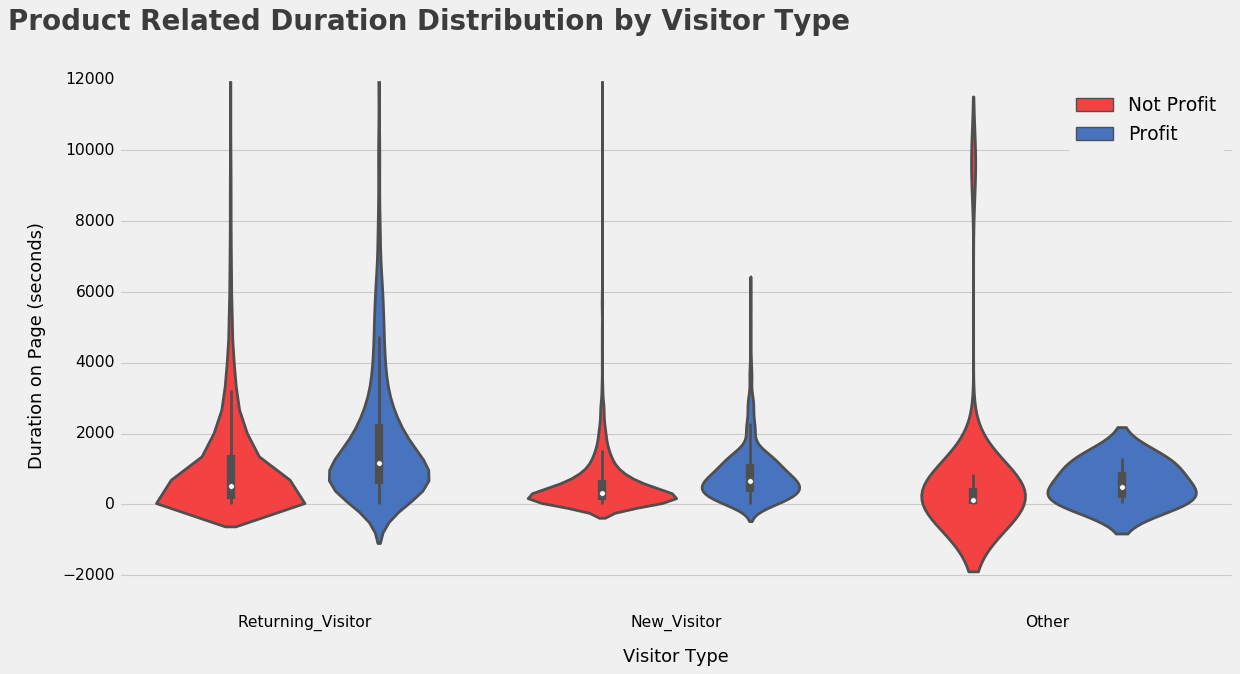

In [77]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'ProductRelated_Duration', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.8, y = 13400, s = "Product Related Duration Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.ylim(ymax=12000, ymin=-3000)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Duration on Page (seconds)",fontsize = 16, labelpad=15)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('14.ProductRelatedDur_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

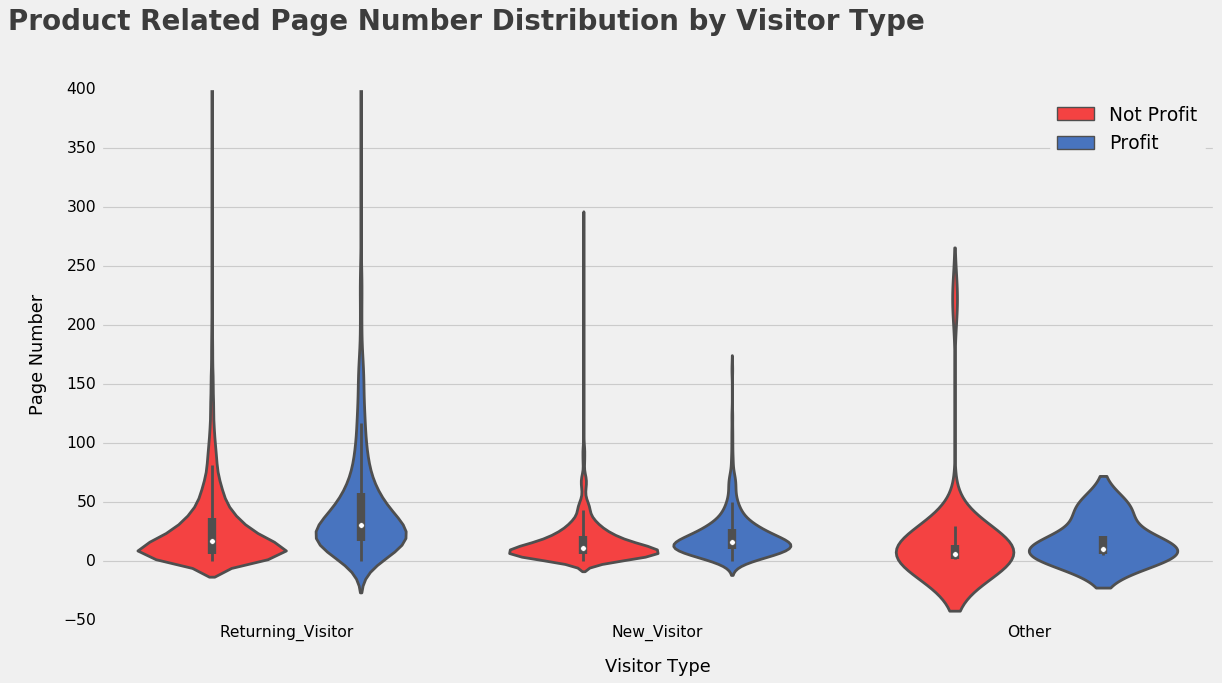

In [79]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'ProductRelated', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.75, y = 450, s = "Product Related Page Number Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.ylim(ymax=400, ymin=-50)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Page Number",fontsize = 16, labelpad=15)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('14.ProductRelated_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

#### Administrative Duration

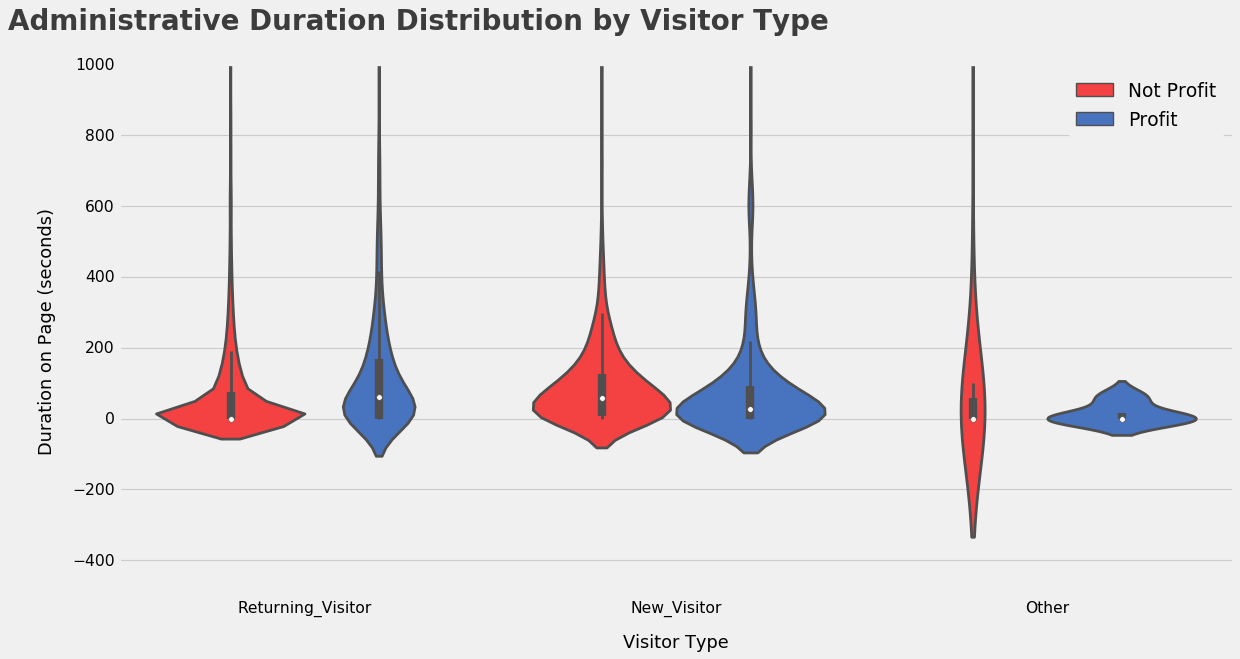

In [80]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'Administrative_Duration', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.8, y = 1100, s = "Administrative Duration Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.ylim(ymax=12000, ymin=-3000)
plt.ylim(ymax=1000, ymin=-500)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Duration on Page (seconds)", fontsize = 16, labelpad=15)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('15.AdministrativeDur_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

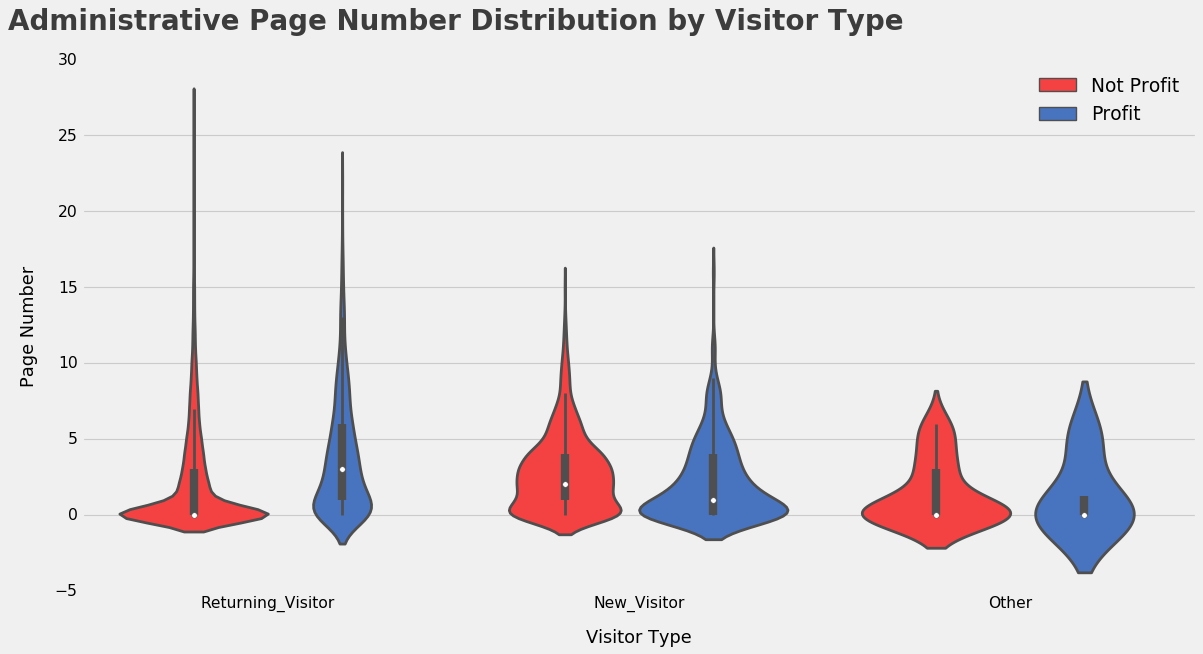

In [81]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'Administrative', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.7, y = 32, s = "Administrative Page Number Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.ylim(ymax=30, ymin=-5)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Page Number", fontsize = 16, labelpad=15)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('15.Administrative_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

#### Informational Duration

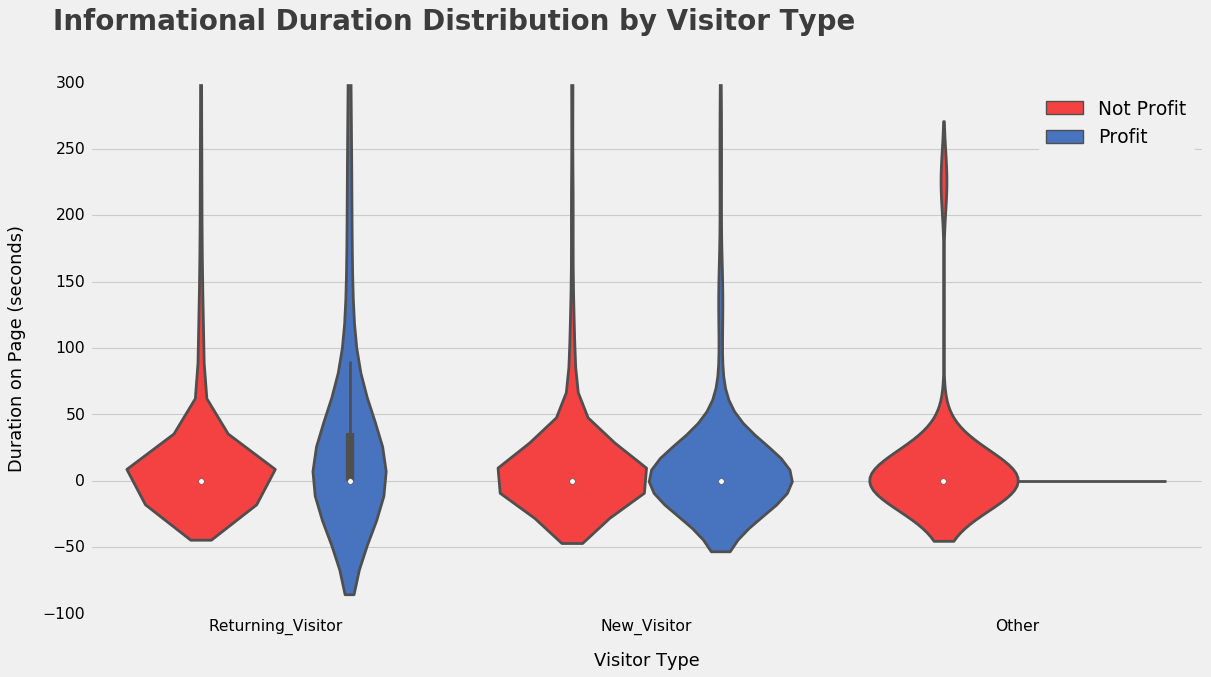

In [82]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'Informational_Duration', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.6, y = 340, s = "Informational Duration Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.ylim(ymax=300, ymin=-100)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Duration on Page (seconds)", fontsize = 16, labelpad=15)

plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('16.InformationDur_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

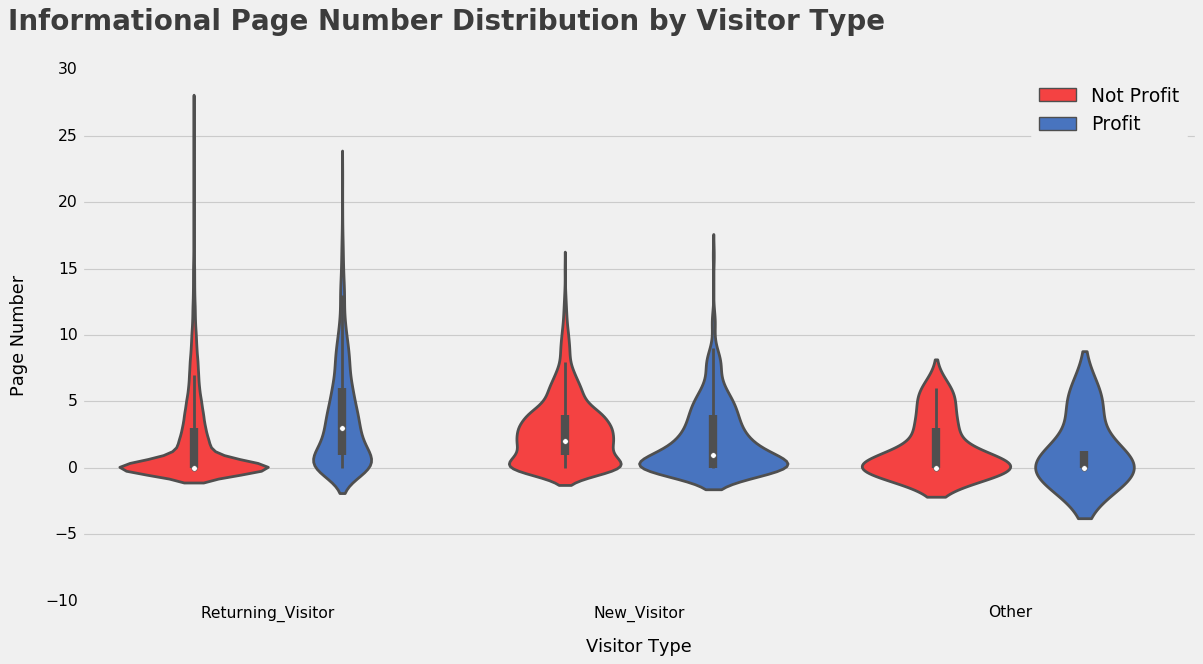

In [83]:
plt.figure(figsize = (16,8))
style.use('classic')
style.use('fivethirtyeight')

sns.violinplot(x='VisitorType', y= 'Administrative', data=df_viz,
               hue='Revenue_type',
#                showmeans=True,
#                showmedians=True,
               showextrema=False,
#                cut=2,
               saturation = 1.2,
               palette=[color1,color2],
               linewidth=2.5,
              )
plt.text(x = -0.7, y = 33, s = "Informational Page Number Distribution by Visitor Type",
               fontsize = 25, weight = 'bold', alpha = .75)
# plt.ylim(ymax=20, ymin=-2)
plt.xlabel("Visitor Type", fontsize = 16, labelpad=15)
plt.ylabel("Page Number", fontsize = 16, labelpad=15)
plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('15.Administrative_violin.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')
plt.show()

From above we can see that:
- Returning visitors tend to spend time longer on Product Related pages, than the new visitors.
- User that generated revenue tent to have longer duration on product related pages.
- Theres no significant difference on visitors activities from informational and administrative page.

## 2.11 Clustering the Customer Behaviour

### 2.11.1 Bounce Rates and Duration

In [284]:
cluster_color1 = '#006ec1' #blue
cluster_color2 = '#fbc41b' #yellow
cluster_color3 = '#00bfa5' #green
cluster_color4 = '#ff250d' #red

#### Product Related Duration vs Bounce Rates

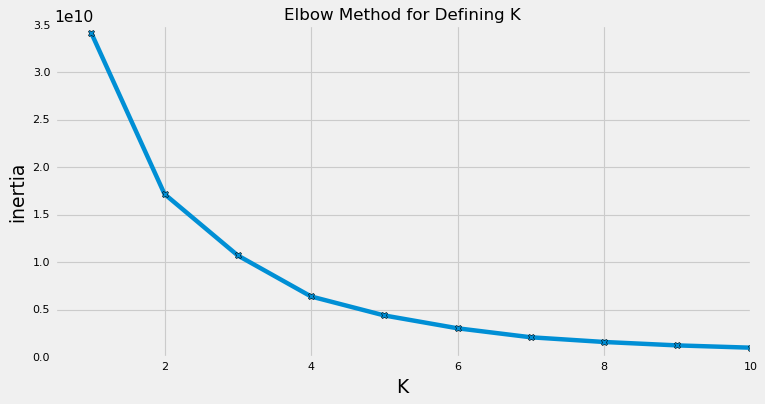

In [285]:
# Lets Cluster the Group 
cluster1 = df_viz[['ProductRelated_Duration','BounceRates']]

plt.figure(figsize=(10,5))

inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster1)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method for Defining K', size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlim(xmin=0.5)


plt.show()

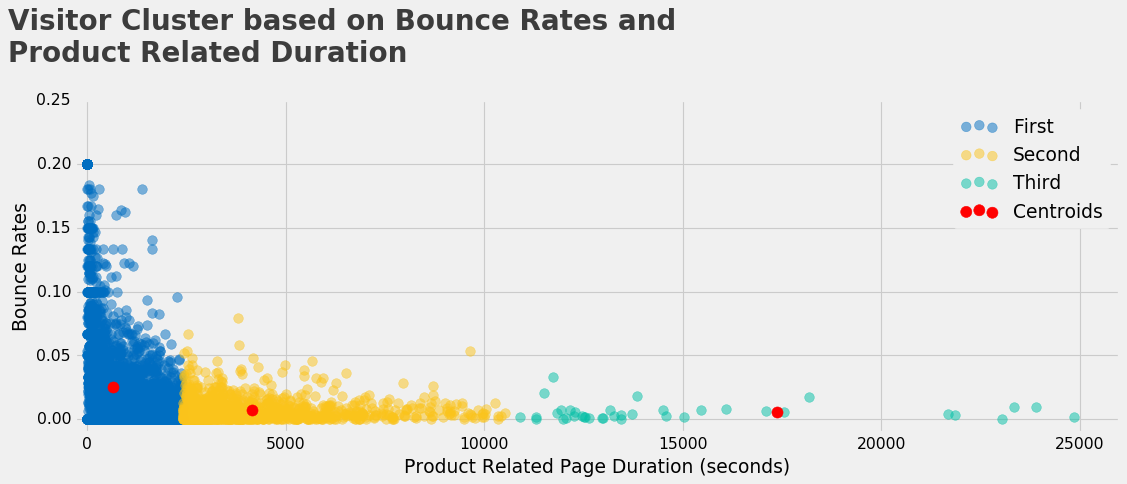

Percentage of Profitable User based on the cluster:
Class  1 ( 88.0 % of population ) :  13.22 %
Class  2 ( 11.0 % of population ) :  23.28 %
Class  3 ( 0.0 % of population ) :  26.19 %


In [286]:
cluster = cluster1
n = 3
markersize = 75

kms = KMeans(n_clusters=n,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster)
pred = kms.fit_predict(cluster)


style.use('classic')
style.use('fivethirtyeight')

style.use('classic')
style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.scatter(cluster.iloc[pred == 0,0],cluster.iloc[pred == 0,1],label='First',color =cluster_color1,s=markersize, alpha=0.5)
plt.scatter(cluster.iloc[pred == 1,0],cluster.iloc[pred == 1,1],label ='Second',color=cluster_color2,s=markersize, alpha=0.5)
plt.scatter(cluster.iloc[pred == 2,0],cluster.iloc[pred == 2,1],label='Third',color=cluster_color3,s=markersize, alpha=0.5)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.text(x = -2000, y = 0.28, s = "Visitor Cluster based on Bounce Rates and \nProduct Related Duration",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('Product Related Page Duration (seconds)')
plt.ylabel('Bounce Rates')
plt.legend(loc='best',
#           prop={size:15}
          )
plt.xlim(xmin=-300,
        xmax=26000
        )
plt.ylim(ymin=-0.01)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('18.ProductDurvsBounceRates_cluster.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

print('Percentage of Profitable User based on the cluster:')
for i in np.arange(0,n,1):
    print('Class ',i+1,'(',round(df_viz[pred==i].shape[0]/df_viz.shape[0],2)*100,'% of population ) : ',  round(df_viz[pred==i]['Revenue'].value_counts(normalize=True)[1],4)*100, '%')

#### Administrative Duration vs Bounce Rates

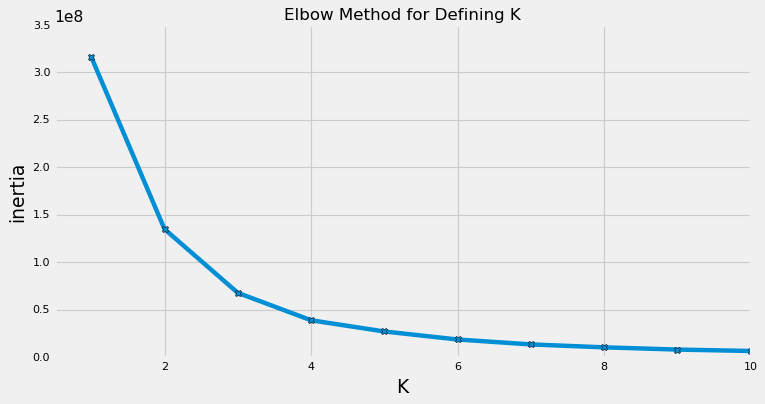

In [287]:
# Lets Cluster the Group 
cluster2 = df_viz[['Administrative_Duration','BounceRates']]

plt.figure(figsize=(10,5))

inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster2)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method for Defining K', size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlim(xmin=0.5)


plt.show()

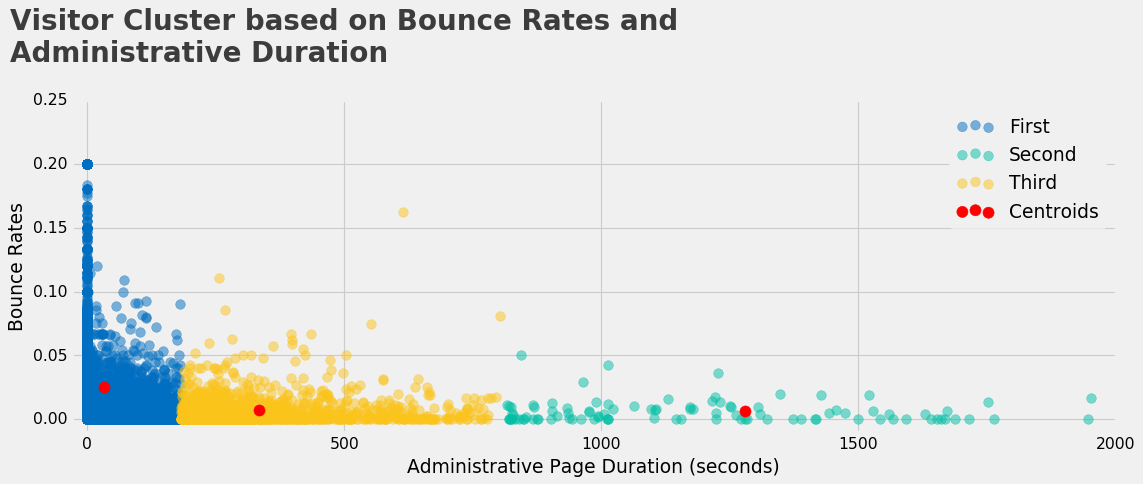

Percentage of Profitable User based on the cluster:
Class  1 ( 87.09 % of population ) :  13.28 %
Class  2 ( 1.06 % of population ) :  18.87 %
Class  3 ( 11.85 % of population ) :  22.400000000000002 %


In [288]:
cluster = cluster2
n = 3

kms = KMeans(n_clusters=n,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster)
pred = kms.fit_predict(cluster)

style.use('classic')
style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.scatter(cluster.iloc[pred == 0,0],cluster.iloc[pred == 0,1],label='First',s=markersize, alpha=0.5,color =cluster_color1)
plt.scatter(cluster.iloc[pred == 1,0],cluster.iloc[pred == 1,1],label='Second',s=markersize,alpha=0.5,color=cluster_color3)
plt.scatter(cluster.iloc[pred == 2,0],cluster.iloc[pred == 2,1],label='Third',s=markersize,alpha=0.5,color=cluster_color2)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.text(x = -150, y = 0.28, s = "Visitor Cluster based on Bounce Rates and \nAdministrative Duration",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('Administrative Page Duration (seconds)')
plt.ylabel('Bounce Rates')
plt.legend(loc='best')
plt.xlim(xmin=-30,
        xmax=2000
        )
plt.ylim(ymin=-0.01)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('19.AdmDurvsBounceRates_cluster.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

print('Percentage of Profitable User based on the cluster:')
for i in np.arange(0,n,1):
    print('Class ',i+1,'(',round(df_viz[pred==i].shape[0]/df_viz.shape[0],4)*100,'% of population ) : ',  round(df_viz[pred==i]['Revenue'].value_counts(normalize=True)[1],4)*100, '%')

#### Informational Duration vs Bounce Rates

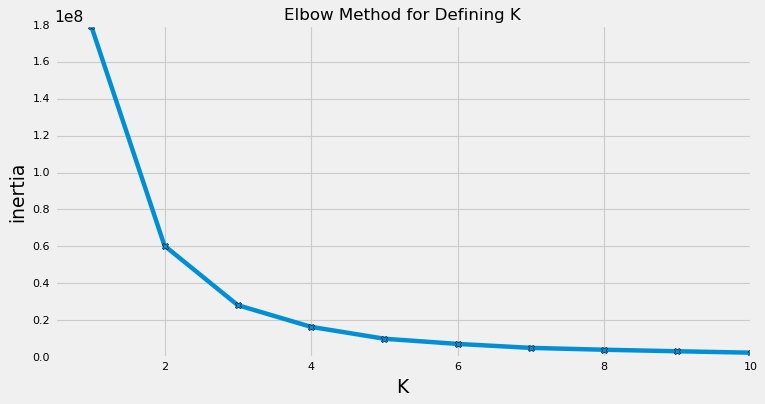

In [289]:
# Lets Cluster the Group 
cluster3 = df_viz[['Informational_Duration','BounceRates']]

plt.figure(figsize=(10,5))
inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster3)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method for Defining K', size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlim(xmin=0.5)

plt.show()

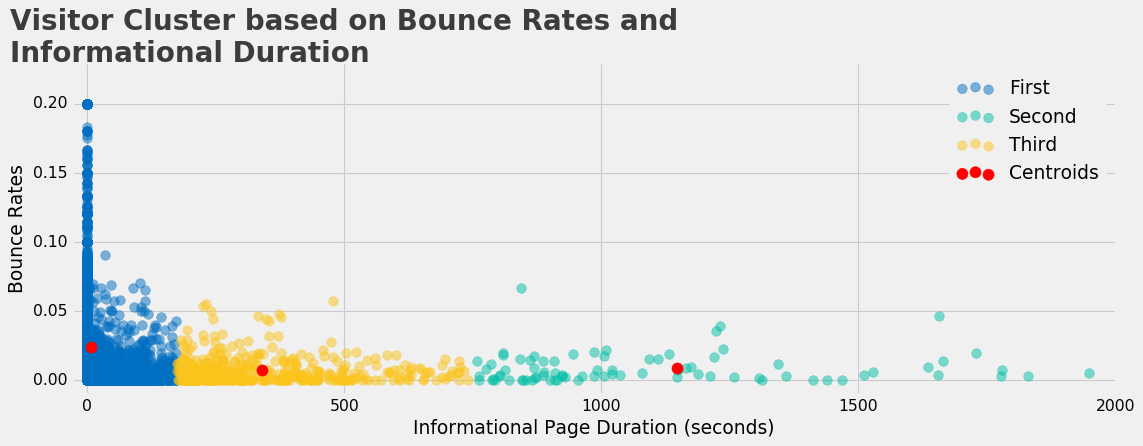

Percentage of Profitable User based on the cluster:
Class  1 ( 94.883 % of population ) :  13.69 %
Class  2 ( 0.851 % of population ) :  23.53 %
Class  3 ( 4.266 % of population ) :  28.87 %


In [291]:
cluster = cluster3
n=3

kms = KMeans(n_clusters=n,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster)
pred = kms.fit_predict(cluster)

style.use('classic')
style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.scatter(cluster.iloc[pred == 0,0],cluster.iloc[pred == 0,1],label='First',s=markersize,alpha=0.5,color =cluster_color1)
plt.scatter(cluster.iloc[pred == 1,0],cluster.iloc[pred == 1,1],label ='Second',s=markersize,alpha=0.5,color=cluster_color3)
plt.scatter(cluster.iloc[pred == 2,0],cluster.iloc[pred == 2,1],label='Third',s=markersize,alpha=0.5,color=cluster_color2)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.text(x = -150, y = 0.23, s = "Visitor Cluster based on Bounce Rates and \nInformational Duration",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('Informational Page Duration (seconds)')
plt.ylabel('Bounce Rates')
plt.legend(loc='best')
plt.xlim(xmin=-30,
        xmax=2000
        )
plt.ylim(ymin=-0.01, ymax=0.23)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('20.InformDurvsBounceRates_cluster.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

print('Percentage of Profitable User based on the cluster:')
for i in np.arange(0,n,1):
    print('Class ',i+1,'(',round(df_viz[pred==i].shape[0]/df_viz.shape[0],5)*100,'% of population ) : ',  round(df_viz[pred==i]['Revenue'].value_counts(normalize=True)[1],4)*100, '%')

### 2.11.2 Page Values

#### Page Values vs Bounce Rates

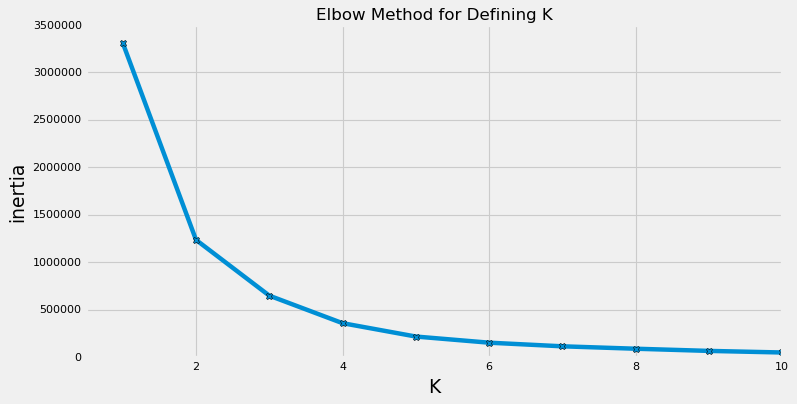

In [292]:
# Lets Cluster the Group 
cluster4 = df_viz[['PageValues','BounceRates','Revenue']]

plt.figure(figsize=(10,5))
inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster4)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method for Defining K', size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlim(xmin=0.5)

plt.show()

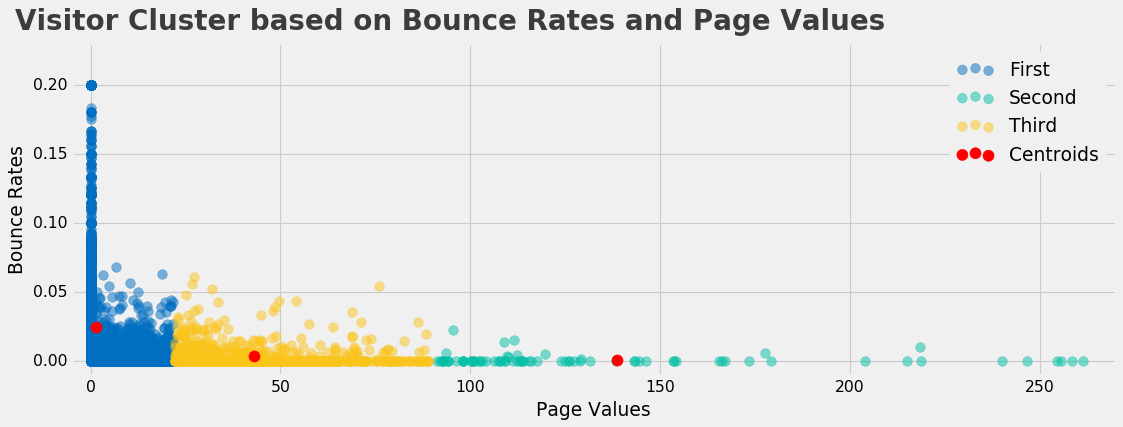

Percentage of Profitable User based on the cluster:
Class  1 ( 91.41 % of population ) :  8.83 %
Class  2 ( 0.8 % of population ) :  88.75 %
Class  3 ( 7.79 % of population ) :  72.37 %


In [294]:
cluster = cluster4
n=3

kms = KMeans(n_clusters=n,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster)
pred = kms.fit_predict(cluster)

style.use('classic')
style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

plt.scatter(cluster.iloc[pred == 0,0],cluster.iloc[pred == 0,1],label='First',s=markersize,alpha=0.5,color =cluster_color1)
plt.scatter(cluster.iloc[pred == 1,0],cluster.iloc[pred == 1,1],label ='Second',s=markersize,alpha=0.5,color=cluster_color3)
plt.scatter(cluster.iloc[pred == 2,0],cluster.iloc[pred == 2,1],label='Third',s=markersize,alpha=0.5,color=cluster_color2)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.text(x = -20, y = 0.24, s = "Visitor Cluster based on Bounce Rates and Page Values",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.legend(loc='best')
plt.xlim(xmin=-5,
        xmax=270
        )
plt.ylim(ymin=-0.01, ymax=0.23)

plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('21.BounceRatesvsPageValues_cluster.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

print('Percentage of Profitable User based on the cluster:')
for i in np.arange(0,n,1):
    print('Class ',i+1,'(',round(df_viz[pred==i].shape[0]/df_viz.shape[0],4)*100,'% of population ) : ',  round(df_viz[pred==i]['Revenue'].value_counts(normalize=True)[1],4)*100, '%')

From above graph we can see that clustering visitor based on the page values and bounce rate might be a good:
- User activites with PageValues above 22 having a higher probability to generate revenue
- User with PageValues higher than 22 tend to have low Bounce Rates (< 0.05)

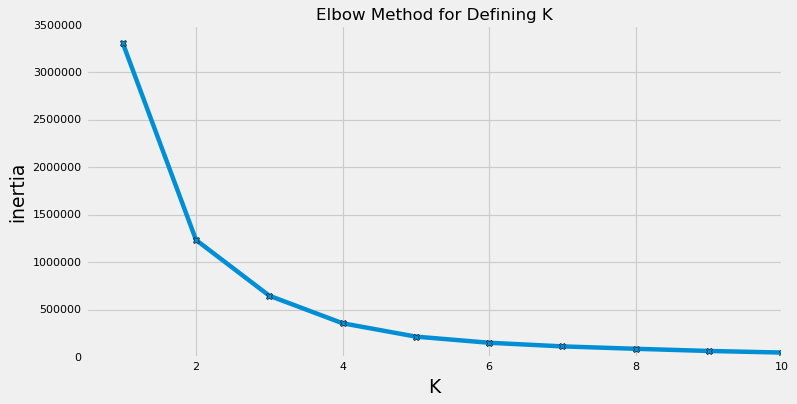

In [306]:
# Lets Cluster the Group 
cluster5 = df_viz[['PageValues','ExitRates']]

plt.figure(figsize=(10,5))

inertia =[]
for i in range(1,11):
    kms = KMeans(n_clusters=i,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster5)
    inertia.append(kms.inertia_)
plt.plot(range(1,11),inertia,marker ='X')
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('Elbow Method for Defining K', size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlim(xmin=0.5)


plt.show()

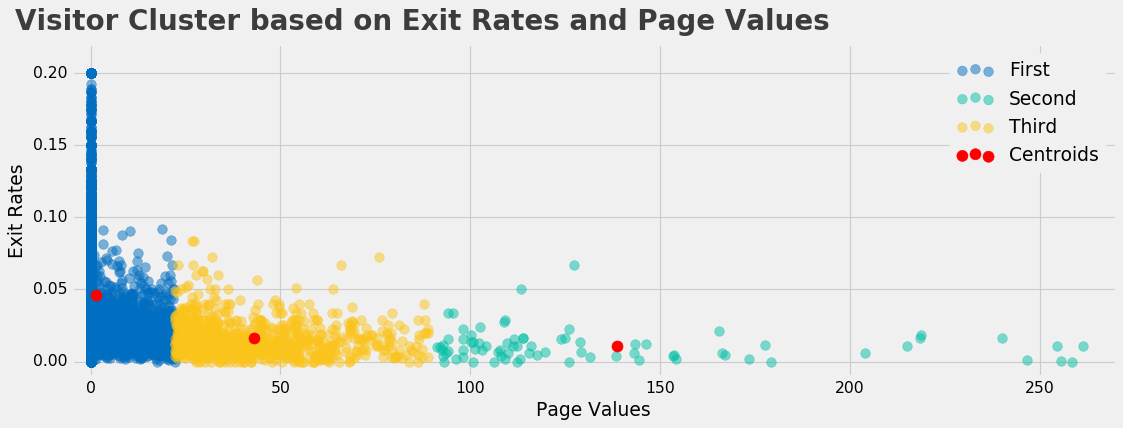

Percentage of Profitable User based on the cluster:
Class  1 ( 91.41 % of population ) :  8.83 %
Class  2 ( 0.8 % of population ) :  88.75 %
Class  3 ( 7.79 % of population ) :  72.37 %


In [307]:
cluster = cluster5
n=3

kms = KMeans(n_clusters=n,max_iter = 100 , n_init = 10,init = 'k-means++',random_state=100).fit(cluster)
pred = kms.fit_predict(cluster)

style.use('classic')
style.use('fivethirtyeight')

plt.figure(figsize=(15,5))

plt.scatter(cluster.iloc[pred == 0,0],cluster.iloc[pred == 0,1],label='First',s=markersize,alpha=0.5,color =cluster_color1)
plt.scatter(cluster.iloc[pred == 1,0],cluster.iloc[pred == 1,1],label ='Second',s=markersize,alpha=0.5,color=cluster_color3)
plt.scatter(cluster.iloc[pred == 2,0],cluster.iloc[pred == 2,1],label='Third',s=markersize,alpha=0.5,color=cluster_color2)
centers = kms.cluster_centers_
plt.scatter(centers[:, 0],centers[:,1],s=100,color='red',label='Centroids')

plt.text(x = -20, y = 0.23, s = "Visitor Cluster based on Exit Rates and Page Values",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.xlabel('Page Values')
plt.ylabel('Exit Rates')
plt.legend(loc='best')
plt.xlim(xmin=-5,
        xmax=270
        )
plt.ylim(ymin=-0.01, ymax=0.22)

plt.legend(loc='best',
#            bbox_to_anchor=(1., 1.05)
          )

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('22.ExitvsPageValues_cluster.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')

plt.show()

print('Percentage of Profitable User based on the cluster:')
for i in np.arange(0,n,1):
    print('Class ',i+1,'(',round(df_viz[pred==i].shape[0]/df_viz.shape[0],4)*100,'% of population ) : ',
          round(df_viz[pred==i]['Revenue'].value_counts(normalize=True)[1],4)*100, '%')

From above graph we can see that clustering visitor based on the page values and exit rates might be a good.
- User activites with PageValues above 22 having a higher probability to generate revenue
- User with PageValues higher than 22 tend to have low Exit Rates (< 0.1)
- Clustering Visitor based on page values vs bounce rates and page values vs exit rates gives relatively same clustering.

# 2.2 Test Data Quick Review

In [382]:
#Monthly Activity
test['Month'].value_counts(normalize=True)

Nov    0.601116
Dec    0.398884
Name: Month, dtype: float64

In [383]:
#VisitorType Overall
test['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.822671
New_Visitor          0.154143
Other                0.023186
Name: VisitorType, dtype: float64

In [386]:
#VisitorType in Nov
test[test.Month=='Nov']['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.87
New_Visitor          0.12
Other                0.01
Name: VisitorType, dtype: float64

In [387]:
#VisitorType in Dec
test[test.Month=='Dec']['VisitorType'].value_counts(normalize=True)

Returning_Visitor    0.751346
New_Visitor          0.205597
Other                0.043057
Name: VisitorType, dtype: float64

In [398]:
test_visitorbymonth = pd.crosstab(test.VisitorType,
                                  test.Month.replace(['Nov','Dec'],[11,12])).apply(lambda r:
                                                                                   round(r/r.sum()*100,6),
                                                                                   axis=0).sort_values(by='VisitorType', ascending=False)
test_visitorbymonth.columns = ['Nov', 'Dec']
test_visitorbymonth

,Nov,Dec
VisitorType,,
Returning_Visitor,87.0,75.134553
Other,1.0,4.305705
New_Visitor,12.0,20.559742


# 3. Data Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       12315 non-null  int64  
 1   Administrative           12315 non-null  float64
 2   Administrative_Duration  12315 non-null  float64
 3   Informational            12315 non-null  float64
 4   Informational_Duration   12315 non-null  float64
 5   ProductRelated           12315 non-null  float64
 6   ProductRelated_Duration  12315 non-null  float64
 7   BounceRates              12315 non-null  float64
 8   ExitRates                12315 non-null  float64
 9   PageValues               12315 non-null  float64
 10  SpecialDay               12315 non-null  object 
 11  Month                    12315 non-null  object 
 12  OperatingSystems         12315 non-null  object 
 13  Browser                  12315 non-null  object 
 14  Region                

In [20]:
df = df.drop(columns= 'Id')

In [21]:
feature = df.drop(columns='Revenue')
label = df['Revenue']

In [22]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12315 entries, 0 to 12314
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12315 non-null  float64
 1   Administrative_Duration  12315 non-null  float64
 2   Informational            12315 non-null  float64
 3   Informational_Duration   12315 non-null  float64
 4   ProductRelated           12315 non-null  float64
 5   ProductRelated_Duration  12315 non-null  float64
 6   BounceRates              12315 non-null  float64
 7   ExitRates                12315 non-null  float64
 8   PageValues               12315 non-null  float64
 9   SpecialDay               12315 non-null  object 
 10  Month                    12315 non-null  object 
 11  OperatingSystems         12315 non-null  object 
 12  Browser                  12315 non-null  object 
 13  Region                   12315 non-null  object 
 14  TrafficType           

In [23]:
feature.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000
mean,2.317661,80.903854,0.504019,34.511869,31.761916,1195.983764,0.022153,0.043003,5.896022
std,3.322854,176.865509,1.270745,140.830188,44.491610,1914.438488,0.048429,0.048529,18.578679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.613333,0.003114,0.025121,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1465.821900,0.016701,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


## 3.1 One Hot Encoding

In [24]:
feature = pd.get_dummies(feature)
feature

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,False,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,False,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,False,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,False,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,True,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,0.0,0.0,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,False,...,0,0,0,0,0,0,0,0,0,1
12311,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,True,...,0,0,0,0,0,0,0,0,0,1
12312,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,True,...,0,0,0,0,0,0,0,0,0,1
12313,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,True,...,0,0,0,0,0,0,0,0,0,1


## 3.3 Scaling Dataset

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
Kalau bisa hasil dari scalingnya diplot KDE.

In [25]:
#Standard Scaler
scaler = StandardScaler()

X_scaled1 = scaler.fit_transform(feature)
X_scaled1 = pd.DataFrame(X_scaled1)
X_scaled1.columns = feature.columns

X_scaled1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,...,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04,1.231500e+04
mean,-5.029549e-15,-1.151183e-15,-1.070195e-16,5.977895e-15,8.894991e-16,-1.341274e-15,3.224740e-17,5.237386e-17,-2.514576e-15,-2.024185e-16,...,-1.442712e-15,-2.198502e-15,6.472264e-16,2.565241e-16,-1.762779e-15,1.539039e-15,-2.005596e-15,2.971593e-15,-9.631811e-15,8.340529e-15
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.975195e-01,-4.574501e-01,-3.966493e-01,-2.450701e-01,-7.139145e-01,-6.247431e-01,-4.574593e-01,-8.861600e-01,-3.173671e-01,-5.506129e-01,...,-3.250752e-02,-5.489554e-02,-1.560976e-02,-9.011569e-03,-2.850750e-02,-3.717981e-02,-1.278307e-01,-3.993687e-01,-8.336740e-02,-2.433604e+00
25%,-6.975195e-01,-4.574501e-01,-3.966493e-01,-2.450701e-01,-5.565751e-01,-5.281051e-01,-4.574593e-01,-5.917748e-01,-3.173671e-01,-5.506129e-01,...,-3.250752e-02,-5.489554e-02,-1.560976e-02,-9.011569e-03,-2.850750e-02,-3.717981e-02,-1.278307e-01,-3.993687e-01,-8.336740e-02,4.109132e-01
50%,-3.965612e-01,-4.122161e-01,-3.966493e-01,-2.450701e-01,-3.093274e-01,-3.115246e-01,-3.931600e-01,-3.684971e-01,-3.173671e-01,-5.506129e-01,...,-3.250752e-02,-5.489554e-02,-1.560976e-02,-9.011569e-03,-2.850750e-02,-3.717981e-02,-1.278307e-01,-3.993687e-01,-8.336740e-02,4.109132e-01
75%,5.063138e-01,7.122167e-02,-3.966493e-01,-2.450701e-01,1.402138e-01,1.409547e-01,-1.125964e-01,1.441883e-01,-3.173671e-01,-5.506129e-01,...,-3.250752e-02,-5.489554e-02,-1.560976e-02,-9.011569e-03,-2.850750e-02,-3.717981e-02,-1.278307e-01,-3.993687e-01,-8.336740e-02,4.109132e-01
max,7.428355e+00,1.875991e+01,1.849068e+01,1.785814e+01,1.513241e+01,3.279295e+01,3.672467e+00,3.235233e+00,1.915541e+01,1.816158e+00,...,3.076211e+01,1.821642e+01,6.406247e+01,1.109685e+02,3.507848e+01,2.689632e+01,7.822849e+00,2.503952e+00,1.199510e+01,4.109132e-01


In [26]:
print('Highest Feature Values: \n', X_scaled1.max().sort_values(ascending=False).head(10))
print('Lowest Feature Values: \n', X_scaled1.max().sort_values(ascending=False).tail(10))

Highest Feature Values: 
 TrafficType_12             110.968464
TrafficType_17             110.968464
Browser_9                  110.968464
TrafficType_16              64.062470
OperatingSystems_5          45.293487
Browser_11                  45.293487
OperatingSystems_7          41.931918
TrafficType_18              35.078483
Browser_12                  35.078483
ProductRelated_Duration     32.792951
dtype: float64
Lowest Feature Values: 
 OperatingSystems_1               1.941535
Weekend                          1.816158
Month_Nov                        1.763267
Month_May                        1.631536
TrafficType_2                    1.466432
Region_1                         1.256821
OperatingSystems_2               0.931758
Browser_2                        0.740852
VisitorType_Returning_Visitor    0.410913
SpecialDay_0.0                   0.336258
dtype: float64


In [27]:
print('10 highest value for std: \n', X_scaled1.std().sort_values(ascending=False).head(10))
print('10 lowest value for std: \n', X_scaled1.std().sort_values(ascending=False).tail(10))

10 highest value for std: 
 TrafficType_19        1.000041
SpecialDay_0.4        1.000041
OperatingSystems_7    1.000041
SpecialDay_0.0        1.000041
Month_Feb             1.000041
SpecialDay_0.6        1.000041
SpecialDay_1.0        1.000041
TrafficType_18        1.000041
Browser_6             1.000041
TrafficType_13        1.000041
dtype: float64
10 lowest value for std: 
 VisitorType_New_Visitor    1.000041
TrafficType_1              1.000041
Browser_4                  1.000041
Month_Oct                  1.000041
Browser_7                  1.000041
Month_Mar                  1.000041
TrafficType_17             1.000041
TrafficType_9              1.000041
Browser_9                  1.000041
TrafficType_12             1.000041
dtype: float64


After scaling, standard deviation for all features are 1.00041

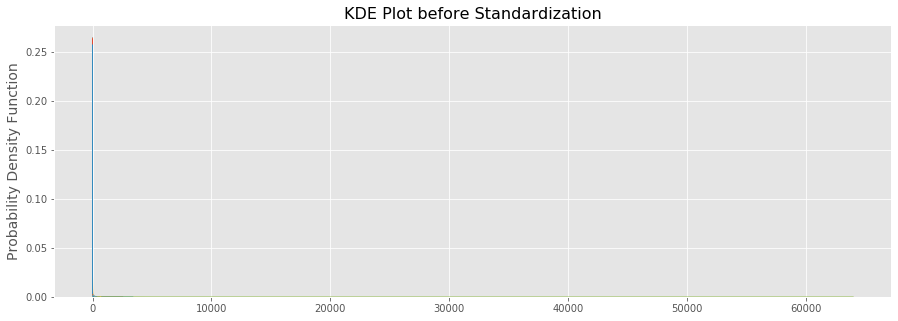

In [28]:
style.use('ggplot')
plt.figure(figsize=(15,5))
for i in feature.columns:
    kde_scaled = sns.kdeplot(feature[i], shade=False, bw=1.5, linewidth=0.5)

plt.legend().set_visible(False)
plt.title('KDE Plot before Standardization', size=16)
plt.ylabel('Probability Density Function', size=14)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('kdeplot_before1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()


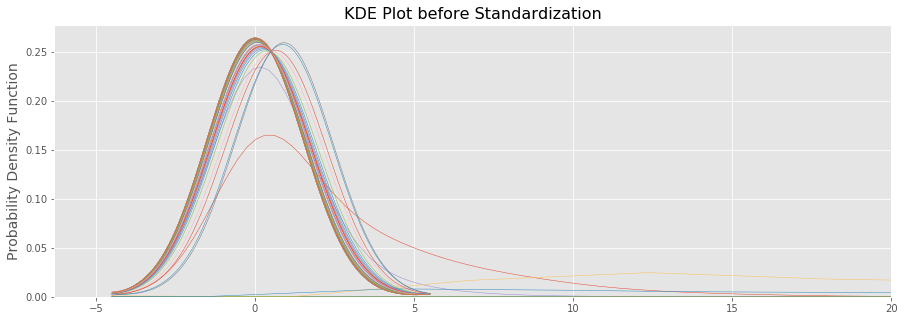

In [30]:
style.use('ggplot')
plt.figure(figsize=(15,5))
for i in feature.columns:
    kde_scaled = sns.kdeplot(feature[i], shade=False, bw=1.5, linewidth=0.5)
    plt.xlim(xmax=20)

plt.legend().set_visible(False)
plt.title('KDE Plot before Standardization', size=16)
plt.ylabel('Probability Density Function', size=14)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('kdeplot_before2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()


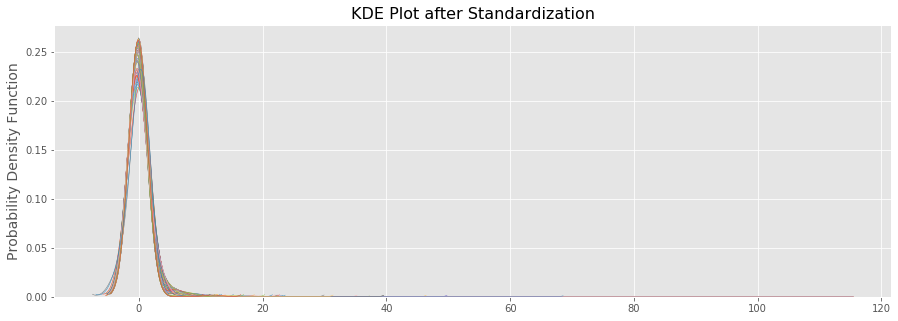

In [31]:
style.use('ggplot')
plt.figure(figsize=(15,5))
for i in X_scaled1.columns:
    kde_scaled = sns.kdeplot(X_scaled1[i], shade=False, bw=1.5, linewidth=0.5)
#     plt.xlim(xmax=6)

plt.legend().set_visible(False)
plt.title('KDE Plot after Standardization', size=16)
plt.ylabel('Probability Density Function', size=14)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('kdeplot_afterstd1.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

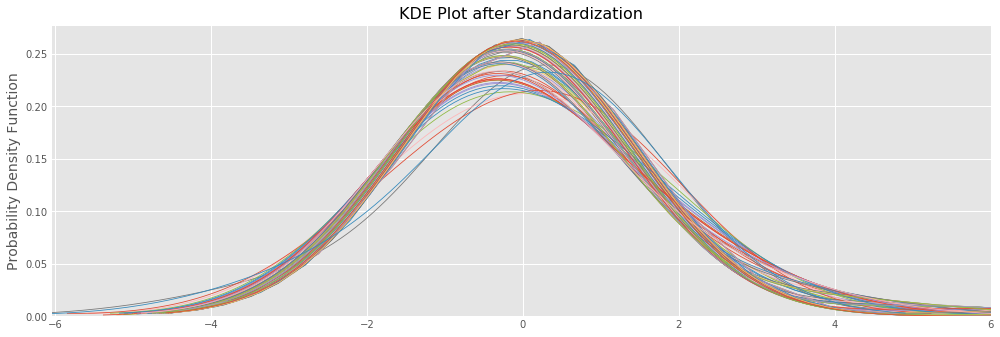

In [44]:
style.use('ggplot')
plt.figure(figsize=(15,5))
for i in X_scaled1.columns:
    kde_scaled = sns.kdeplot(X_scaled1[i], shade=False, bw=1.5, linewidth=0.8)
    plt.xlim(xmax=6)

plt.legend().set_visible(False)
plt.title('KDE Plot after Standardization', size=16)
plt.ylabel('Probability Density Function', size=14)

#Saving Figure
root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100
plt.savefig('kdeplot_afterstd2.png', tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


plt.show()

## 3.2 Multicollinearity Checking

In [29]:
# Calculate all correlations in dataframe
corrs = X_scaled1.corr()
corrs

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.601455,0.376805,0.255759,0.430820,0.373637,-0.223467,-0.316192,0.098774,0.026427,...,0.010438,-0.015072,0.003206,-0.006286,-0.001867,-0.010137,-0.011249,0.028160,-0.021253,-0.022584
Administrative_Duration,0.601455,1.000000,0.302657,0.237958,0.288850,0.355225,-0.144074,-0.205573,0.067460,0.014998,...,0.036071,-0.002746,0.018978,-0.004122,-0.001413,-0.008563,-0.000744,0.024856,-0.008583,-0.022331
Informational,0.376805,0.302657,1.000000,0.618958,0.374122,0.387462,-0.116079,-0.163543,0.048538,0.035540,...,0.042207,-0.003093,-0.006192,-0.003574,-0.004577,-0.006142,-0.019711,-0.053583,-0.021490,0.057559
Informational_Duration,0.255759,0.237958,0.618958,1.000000,0.279969,0.347300,-0.074019,-0.105150,0.030780,0.024037,...,0.033334,-0.011234,-0.003825,-0.002208,-0.001602,0.024014,-0.011087,-0.043317,-0.013513,0.045622
ProductRelated,0.430820,0.288850,0.374122,0.279969,1.000000,0.860867,-0.204462,-0.292219,0.056070,0.016122,...,0.034909,-0.018782,-0.005764,-0.005623,-0.011445,0.006590,-0.033374,-0.123043,-0.036149,0.129064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TrafficType_19,-0.010137,-0.008563,-0.006142,0.024014,0.006590,0.006125,0.002762,0.005178,-0.004800,0.005410,...,-0.001209,-0.002041,-0.000580,-0.000335,-0.001060,1.000000,-0.004753,-0.008499,-0.003100,0.009057
TrafficType_20,-0.011249,-0.000744,-0.019711,-0.011087,-0.033374,-0.030560,0.014203,0.011974,0.063525,-0.026073,...,-0.004155,-0.007017,-0.001995,-0.001152,-0.003644,-0.004753,1.000000,-0.019187,0.394838,-0.074188
VisitorType_New_Visitor,0.028160,0.024856,-0.053583,-0.043317,-0.123043,-0.116740,-0.139307,-0.183708,0.104823,0.047374,...,-0.005723,-0.013308,0.008873,-0.003599,-0.003108,-0.008499,-0.019187,1.000000,-0.033294,-0.971905
VisitorType_Other,-0.021253,-0.008583,-0.021490,-0.013513,-0.036149,-0.027243,0.028229,0.034953,0.055177,-0.029654,...,-0.002710,-0.004576,-0.001301,-0.000751,-0.002377,-0.003100,0.394838,-0.033294,1.000000,-0.202883


In [30]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [31]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
print('Multicollinearity Features:', cols_to_remove)

Number of columns to remove:  4
Multicollinearity Features: ['ProductRelated_Duration', 'Browser_1', 'ExitRates', 'Browser_11']


In [32]:
for i in enumerate(cols_to_remove):
    print('Most collerated variable for', i[1])
    print(abs(X_scaled1.corr()[i[1]]).sort_values(ascending=False).head(3))
    print('\n')

Most collerated variable for ProductRelated_Duration
ProductRelated_Duration    1.000000
ProductRelated             0.860867
Informational              0.387462
Name: ProductRelated_Duration, dtype: float64


Most collerated variable for Browser_1
Browser_1             1.000000
OperatingSystems_1    0.815590
Browser_2             0.674213
Name: Browser_1, dtype: float64


Most collerated variable for ExitRates
ExitRates         1.000000
BounceRates       0.913437
Administrative    0.316192
Name: ExitRates, dtype: float64


Most collerated variable for Browser_11
OperatingSystems_5    1.000000
Browser_11            1.000000
TrafficType_14        0.112597
Name: Browser_11, dtype: float64




In [33]:
feature = X_scaled1.drop(columns=cols_to_remove)

## Without removing multicollinearity, comment if it doesn't needed
# feature = X_scaled1
feature

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,SpecialDay_0.0,SpecialDay_0.2,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.697519,-0.457450,-0.396649,-0.24507,-0.691437,3.672467,-0.317367,-0.550613,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
1,-0.697519,-0.457450,-0.396649,-0.24507,-0.668960,-0.457459,-0.317367,-0.550613,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
2,-0.697519,-0.457450,-0.396649,-0.24507,-0.691437,3.672467,-0.317367,-0.550613,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
3,-0.697519,-0.457450,-0.396649,-0.24507,-0.668960,0.575022,-0.317367,-0.550613,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
4,-0.697519,-0.457450,-0.396649,-0.24507,-0.489144,-0.044467,-0.317367,1.816158,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,-0.697519,-0.457450,0.390323,-0.24507,-0.354282,-0.457459,-0.317367,-0.550613,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
12311,0.205355,0.362415,-0.396649,-0.24507,0.477370,-0.309962,0.341572,1.816158,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
12312,-0.697519,-0.457450,-0.396649,-0.24507,-0.601529,-0.457459,-0.317367,1.816158,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913
12313,-0.697519,-0.457450,-0.396649,-0.24507,-0.579052,1.263343,-0.317367,1.816158,0.336258,-0.121103,...,-0.032508,-0.054896,-0.01561,-0.009012,-0.028508,-0.03718,-0.127831,-0.399369,-0.083367,0.410913


In [34]:
test_index = list(df[df['Revenue'].isnull()==True].index)
test_index

[9986,
 9987,
 9988,
 9989,
 9990,
 9991,
 9992,
 9993,
 9994,
 9995,
 9996,
 9997,
 9998,
 9999,
 10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 10110,
 10111,
 10112

In [35]:
X = feature.drop(test_index)
y = label.drop(test_index)

In [36]:
y = y.replace(['True','False'],[True,False])

## 3.2 Feature Importance

In [42]:
#Function to plot final feature selection 

def plot_feature_importance(dataframe, savename):
    style.use('classic')
    style.use('fivethirtyeight')
    
    sel_col_viz = pd.DataFrame(dataframe).reset_index()
    
    plt.figure(figsize=(15,5))
    plt.text(x = -0.08, y = -0.7, s = "Feature Selection with Feature Importance",
               fontsize = 25, weight = 'bold', alpha = .75)
    graph = sns.barplot(x=0, y='index', data=sel_col_viz, alpha=0.8, color='#00bfa5')
    for i, v in enumerate(sel_col_viz[0]):
        plt.text(v + 0.002, i, str(round(v,2)), color='black',
                 fontsize=12, ha='left', va='center')
    
    plt.ylabel('')
    plt.xlabel('Feature Importance', labelpad=15, size=17)
    plt.yticks(size=13)
    plt.xlim(xmax=max(sel_col_viz[0])+0.1)
    
    #Saving Figure
    root = tk.Tk()
    width = root.winfo_screenwidth()
    height = root.winfo_screenheight()
    mydpi = 100
    plt.savefig(str(savename+'.png'), tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')
    
    plt.show()

In [37]:
#Setting up threshold for feature importance
thres_feature_imp = 0.05

#### Decision Tree

In [38]:
model1= DecisionTreeClassifier(random_state=0)
model1.fit(X,y)

sel_col1 = pd.Series(model1.feature_importances_,index=X.columns).sort_values(ascending=False).head(6)
# sel_col1 = sel_col1[sel_col1 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col1.shape[0])
sel_col1

Selected Columns Qty:  6


PageValues                 0.462050
BounceRates                0.091240
ProductRelated             0.081347
Administrative_Duration    0.065309
Administrative             0.046655
Informational_Duration     0.023538
dtype: float64

#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier 
model2= RandomForestClassifier(n_estimators=100,random_state=0)
model2.fit(X,y)

sel_col2 = pd.Series(model2.feature_importances_,index=X.columns).sort_values(ascending=False).head(25)
sel_col2

PageValues                       0.370727
ProductRelated                   0.090482
Administrative_Duration          0.070328
BounceRates                      0.067002
Administrative                   0.051567
Informational_Duration           0.031361
Informational                    0.021773
Month_Nov                        0.018037
Weekend                          0.013415
Region_1                         0.013304
TrafficType_2                    0.012502
Browser_2                        0.011877
Region_3                         0.010862
OperatingSystems_2               0.010272
VisitorType_New_Visitor          0.010266
VisitorType_Returning_Visitor    0.009953
Region_2                         0.008285
Month_May                        0.008133
OperatingSystems_1               0.008045
TrafficType_1                    0.007729
OperatingSystems_3               0.007432
Region_4                         0.007379
TrafficType_3                    0.007187
TrafficType_4                    0

In [41]:
sel_col2 = sel_col2[sel_col2 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col2.shape[0])
sel_col2

Selected Columns Qty:  5


PageValues                 0.370727
ProductRelated             0.090482
Administrative_Duration    0.070328
BounceRates                0.067002
Administrative             0.051567
dtype: float64

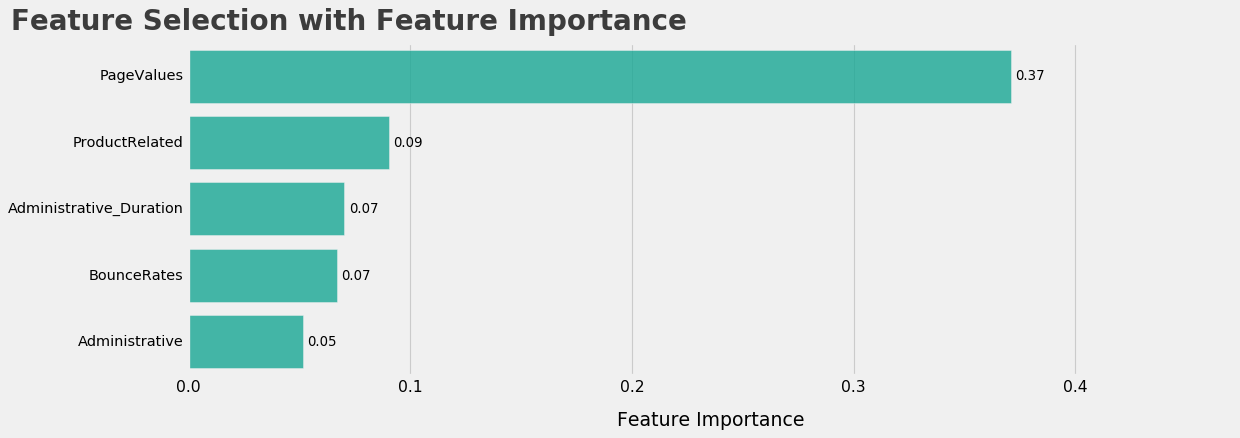

In [43]:
plot_feature_importance(sel_col2, 'FeatureImportancePlot')

The final selected feature by the result of random forest feature importance:

In [44]:
sel_col2 = list(sel_col2.reset_index()['index'])

#### AdaBoost
*For comparation*

In [47]:
model3= AdaBoostClassifier(random_state=0)
model3.fit(X,y)

sel_col3 = pd.Series(model3.feature_importances_,index=X.columns).sort_values(ascending=False).head(6)
# sel_col3 = sel_col3[sel_col3 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col3.shape[0])
sel_col3

Selected Columns Qty:  6


PageValues        0.14
ProductRelated    0.12
Administrative    0.08
BounceRates       0.08
Month_Nov         0.04
Informational     0.04
dtype: float64

The final selected feature by the result of adaboost feature importance

In [48]:
sel_col3 = list(sel_col3.reset_index()['index'])

#### GradientBoost
*Only for comparation*

In [49]:
model4= GradientBoostingClassifier(random_state=0)
model4.fit(X,y)

sel_col4 = pd.Series(model4.feature_importances_,index=X.columns).sort_values(ascending=False).head(6)
# sel_col4 = sel_col4[sel_col4 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col4.shape[0])
sel_col4

Selected Columns Qty:  6


PageValues                 0.780268
BounceRates                0.050817
ProductRelated             0.034308
Administrative             0.028813
Month_Nov                  0.028516
Administrative_Duration    0.022046
dtype: float64

The final selected feature by the result of gradientoost feature importance

In [50]:
sel_col4 = list(sel_col4.reset_index()['index'])

#### XGBoost

In [51]:
model5= XGBClassifier(random_state=0)
model5.fit(X,y)

sel_col5 = pd.Series(model5.feature_importances_,index=X.columns).sort_values(ascending=False).head(10)
# sel_col5 = sel_col5[sel_col5 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col5.shape[0])
sel_col5

Selected Columns Qty:  10


PageValues                       0.112166
Month_Nov                        0.052080
VisitorType_Returning_Visitor    0.042525
Month_May                        0.041723
Month_Mar                        0.040559
Month_Sep                        0.024839
Region_4                         0.022098
TrafficType_13                   0.021767
BounceRates                      0.020898
Administrative                   0.020597
dtype: float32

The final selected feature by the result of xgboost feature importance

In [52]:
sel_col5 = list(sel_col5.reset_index()['index'])

#### Support Vector Classifier
*For comparison*

In [53]:
model6= SVC(random_state=0, kernel='linear')
model6.fit(X,y)

sel_col6 = pd.Series(abs(model6.coef_[0]),index=X.columns).sort_values(ascending=False).head(6)
# sel_col6 = sel_col6[sel_col6 > thres_feature_imp]

print('Selected Columns Qty: ', sel_col6.shape[0])
sel_col6

Selected Columns Qty:  6


PageValues        0.909421
Administrative    0.055860
Month_May         0.044627
Month_Nov         0.027006
BounceRates       0.025917
SpecialDay_0.6    0.025549
dtype: float64

The final selected feature by the result of support vector feature importance

In [54]:
sel_col6 = list(sel_col6.reset_index()['index'])

For final selected features, we will use the random forest feature importance result:
    - The test data that will be predicted consist only activity from November and December, the 

## 3.4 Splitting Train and Validation Data

In [132]:
valid_size = 0.2

In [133]:
#Splitting train cand validation data
X_training, X_validating, y_training, y_validating = train_test_split(X, y, stratify=y,
                                                                   random_state=123, test_size=valid_size)

## 3.5 Imbalanced Dataset

In [134]:
y_training.value_counts(normalize=True)

False    0.855784
True     0.144216
Name: Revenue, dtype: float64

In [135]:
y_training.value_counts()

False    6836
True     1152
Name: Revenue, dtype: int64

### 3.5.1 Oversampling with SMOTE

In [136]:
smt = SMOTE()
X_training1, y_training1 = smt.fit_sample(X_training, y_training)

In [137]:
y_training1.value_counts()

True     6836
False    6836
Name: Revenue, dtype: int64

In [138]:
#For non KFold method
# X_training_dtc1, X_validating_dtc1 = X_training1[sel_col1], X_validating[sel_col1]
X_training_rf1, X_validating_rf1   = X_training1[sel_col2], X_validating[sel_col2] 
# X_training_ada1, X_validating_ada1 = X_training1[sel_col3], X_validating[sel_col3] 
# X_training_grb1, X_validating_grb1 = X_training1[sel_col4], X_validating[sel_col4] 
# X_training_xgb1, X_validating_xgb1 = X_training1[sel_col5], X_validating[sel_col5] 
# X_training_svc1, X_validating_svc1 = X_training1[sel_col6], X_validating[sel_col6]

# X_training_all1 = [X_training_dtc1,X_training_rf1,X_training_ada1,
#                    X_training_grb1,X_training_xgb1,X_training_svc1]
# X_validating_all1 = [X_validating_dtc1,X_validating_rf1,X_validating_ada1,
#                      X_validating_grb1,X_validating_xgb1,X_validating_svc1]

In [139]:
#For KFold necessity
X_os, y_os = smt.fit_sample(X, y)

# X_dtc_os = X_os[sel_col1]
X_rf_os  = X_os[sel_col2]
# X_ada_os = X_os[sel_col3]
# X_grb_os = X_os[sel_col4]
# X_xgb_os = X_os[sel_col5]
# X_svc_os = X_os[sel_col6]

# X_all_os = [X_dtc_os, X_rf_os, X_ada_os, X_grb_os, X_xgb_os, X_svc_os]

### 3.5.2 Undersampling with RandomUnderSampler

In [140]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus.fit(X_training, y_training)

col = X_training.columns
X_training2, y_training2 = rus.fit_resample(X_training, y_training)
X_training2 = pd.DataFrame(X_training2, columns = col)

In [141]:
y_training2.value_counts()

True     1152
False    1152
Name: Revenue, dtype: int64

In [142]:
#For Non KFold Method 
# X_training_dtc2, X_validating_dtc2 = X_training2[sel_col1], X_validating[sel_col1]
X_training_rf2, X_validating_rf2   = X_training2[sel_col2], X_validating[sel_col2] 
# X_training_ada2, X_validating_ada2 = X_training2[sel_col3], X_validating[sel_col3] 
# X_training_grb2, X_validating_grb2 = X_training2[sel_col4], X_validating[sel_col4] 
# X_training_xgb2, X_validating_xgb2 = X_training2[sel_col5], X_validating[sel_col5] 
# X_training_svc2, X_validating_svc2 = X_training2[sel_col6], X_validating[sel_col6]

# X_training_all2 = [X_training_dtc2,X_training_rf2,X_training_ada2,
#                    X_training_grb2,X_training_xgb2,X_training_svc2]
# X_validating_all2 = [X_validating_dtc2,X_validating_rf2,X_validating_ada2,
#                      X_validating_grb2,X_validating_xgb2,X_validating_svc2]

In [143]:
#For KFold necessity
rus.fit(X, y)
col = X.columns
X_us, y_us = rus.fit_resample(X, y)
X_us = pd.DataFrame(X_us, columns = col)

# X_dtc_us = X_us[sel_col1]
X_rf_us  = X_us[sel_col2]
# X_ada_us = X_us[sel_col3]
# X_grb_us = X_us[sel_col4]
# X_xgb_us = X_us[sel_col5]
# X_svc_us = X_us[sel_col6]

# X_all_us = [X_dtc_us, X_rf_us, X_ada_us, X_grb_us, X_xgb_us, X_svc_us]

# 4. Modeling

In [57]:
model_name = ['Decision Tree',
            'Random Forest',
            'AdaBoost',
            'Gradient Boost',
             'XGBoost',
             'Support Vector']

In [58]:
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
grb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC(probability=True)

model_ori = [dtc,
            rf,
            ada,
            grb,
             xgb,
             svc
            ]

## 4.1 Hyperparameter Tuning

To make sure that at least the model evaluation from hyperparameter optimization is better than the baseline model, we include all default parameter into the grid parameters.

## [Decision Tree]

In [62]:
skfold_gs = StratifiedKFold(n_splits=10, shuffle = True, random_state =123)

In [197]:
criterion = ['gini','entropy'] #default 'gini'
# maxdepth = np.arange(3,6,1) #default None
min_samples_split =[1,2,3] #default 2
min_samples_leaf = [1,2,3] #default 1

hyperparameter = dict(criterion=criterion, max_depth=maxdepth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf)

model_dtc = GridSearchCV(DecisionTreeClassifier(),
                         hyperparameter, cv=skfold_gs, scoring='f1')

## [Random Forest]

In [199]:
n_estimators=[100,200,300] #default 100
criterion=['gini', 'entropy'] #default 'gini'
# max_depth=np.arange(3,6,1) #default None
min_samples_split= [1,2,3] #default 2
min_samples_leaf= [1,2,3] #default 1

hyperparameter = dict(criterion=criterion, max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf)

model_rf = GridSearchCV(RandomForestClassifier(), hyperparameter, cv=skfold_gs, scoring='f1')

## [AdaBoost Classifier]

In [201]:
#base estimator: None = DecisionTreeClassifier(max_depth=1)

learning_rate = [0.05, 0.1, 1] #default 1
n_estimators = [50,100,150,200,250,300] #default 50

hyperparameter=dict(learning_rate=learning_rate,
                     n_estimators=n_estimators)

model_ada= GridSearchCV(AdaBoostClassifier(), hyperparameter, cv=skfold_gs, scoring='f1')

## [Gradient Boosting Classifier]

In [203]:
learning_rate = [0.01,0.2,1] #default 0.1
n_estimators = np.arange(100,300,50) #default 100
max_depth = [3,4,5,6] #default 3

hyperparameter = dict(learning_rate=learning_rate,
                       n_estimators=n_estimators,
                       max_depth=max_depth
                      )

model_grb= GridSearchCV(GradientBoostingClassifier(), hyperparameter, cv=skfold_gs, scoring='f1')

## [XGBoost Classifier]

In [67]:
hyperparameter = {'learning_rate':[0.01, 0.1], #default 0.1
#                  'min_child_weight': [1, 5, 10], #default 1
#                  'gamma': [0.5, 1, 1.5, 2, 5], #default 0
#                  'subsample': [0.6, 0.8, 1.0], #default 1
#                  'colsample_bytree': [0.6, 0.8, 1.0], #default 1
                 'max_depth': [3,4,5,6], #default 3
                 'n_estimators' : np.arange(100,250,50), # default 100
                }
model_xgb = GridSearchCV(xgb, hyperparameter, cv=skfold_gs, scoring='f1')

## [Support Vector Classifier]

In [206]:
hyperparameter = {'kernel':['rbf'], #default rbf
                  'C':[1,2,3,4,5], #default 1
#                   'gamma':[0.01,0.05,0.1,0.2,0.5,1],
                 'probability':[True]} #cannot be False

model_svc =GridSearchCV(SVC(), hyperparameter, cv=skfold_gs, scoring='f1')

Compiling to be trained models into a list

In [207]:
model_tune= [
            model_dtc,
            model_rf,
            model_ada,
            model_grb,
            model_xgb,
            model_svc,
            ]

## 4.2 Model Training

#### Model Training Function for train test split data

In [70]:
def run_model(model, X_training, X_validating, y_training, y_validating, model_perform, model_name):
    start_time = timer()
    
    model.fit(X_training, y_training)
    y_pred_proba= model.predict_proba(X_validating)[:,1]
    y_pred = model.predict(X_validating)
    
    end_time = timer()
    dev_time = round((end_time-start_time)/60,2)
    
    #Print Best Parameters and best score
    print('Hyperparameter result for ' + model_name+ ' model:\n')
    print('Best Parameter: '+ str(model.best_params_))
    print('Best Score :' + str(model.best_score_))

    #Print Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_validating, y_pred),'\n')

    #Saving confusion matrix
    i=0
    for j in [0,1]:
        for k in [0,1]:
            model_perform[5][i].append(confusion_matrix(y_validating, y_pred)[j][k])
            i=i+1
            
    #Print Classification Report
    print('Classification Report: \n', classification_report(y_validating,y_pred),'\n')   
    
    #Saving model performance
    model_perform[0].append(roc_auc_score(y_validating, y_pred_proba))
    model_perform[1].append(f1_score(y_validating,y_pred))
    model_perform[2].append(accuracy_score(y_validating,y_pred))
    model_perform[3].append(recall_score(y_validating,y_pred))
    model_perform[4].append(precision_score(y_validating,y_pred))
    model_perform[6].append(dev_time)
    model_perform[7].append(model.best_params_)

In [71]:
#Iterating for model training without hyperparametertuning
def run_model_ori(model, X_training, X_validating, y_training, y_validating, model_perform, model_name):
    start_time = timer()

    model.fit(X_training, y_training)
    y_pred_proba= model.predict_proba(X_validating)[:,1]
    y_pred = model.predict(X_validating)

    end_time = timer()
    dev_time = round((end_time-start_time)/60,2)
    
    #Print Training Result
    print('For', model_name,'Model:\n')
    
    #Print Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_validating, y_pred),'\n')

    #Saving confusion matrix
    i=0
    for j in [0,1]:
        for k in [0,1]:
            model_perform[5][i].append(confusion_matrix(y_validating, y_pred)[j][k])
            i=i+1
                
    #Print Classification Report
    print('Classification Report: \n', classification_report(y_validating,y_pred),'\n')   
    
    #Saving model performance
    model_perform[0].append(roc_auc_score(y_validating, y_pred_proba))
    model_perform[1].append(f1_score(y_validating,y_pred))
    model_perform[2].append(accuracy_score(y_validating,y_pred))
    model_perform[3].append(recall_score(y_validating,y_pred))
    model_perform[4].append(precision_score(y_validating,y_pred))
    model_perform[6].append(dev_time)

**Model Training with KFold Cross Validation** <br>
https://towardsdatascience.com/cross-validation-a-beginners-guide-5b8ca04962cd <br>
https://www.kaggle.com/ogrellier/kfold-or-stratifiedkfold

In [73]:
# Same function as above but with kfold cross validation method 
def run_model_kfold(model, X, y, fold, model_perform, model_name):
    start_time = timer()
    
    model.fit(X,y)     
    y_pred_proba= cross_val_predict(model, X, y, cv=fold, method='predict_proba')[:,1]
    y_pred = cross_val_predict(model, X, y, cv=fold)
    
    end_time = timer()
    dev_time = round((end_time-start_time)/60,2)
    
    #Print Training Result
    print('For', model_name,'Model:\n')
    
    #Print Best Parameters and best score
    print('Hyperparameter result:\n')
    print('Best Parameter: '+ str(model.best_params_))
    print('Best Score :' + str(model.best_score_))
    
    #Print Confusion Matrix
    print('Confusion Matrix:\n',confusion_matrix(y, y_pred))
    
    #Saving confusion matrix
    i=0
    for j in [0,1]:
        for k in [0,1]:
            model_perform[5][i].append(confusion_matrix(y, y_pred)[j][k])
            i=i+1
    
    #Print Classification Report
    print('Classification Report: \n', classification_report(y,y_pred))
    
    #Saving model performance
    model_perform[0].append(roc_auc_score(y, y_pred_proba))
    model_perform[1].append(f1_score(y,y_pred))
    model_perform[2].append(accuracy_score(y,y_pred))
    model_perform[3].append(recall_score(y,y_pred))
    model_perform[4].append(precision_score(y,y_pred))
    model_perform[6].append(dev_time)
    model_perform[7].append(model.best_params_)
    

In [74]:
# Same function as above but with kfold cross validation method 
def run_model_kfold_ori(model, X, y, fold, model_perform, model_name):
    start_time = timer()
    
    model.fit(X,y) 
    y_pred_proba= cross_val_predict(model, X, y, cv=fold, method='predict_proba')[:,1]
    y_pred = cross_val_predict(model, X, y, cv=fold)
    
    end_time = timer()
    dev_time = round((end_time-start_time)/60,2)
    
    #Print Confusion Matrix
    print('Confusion Matrix for',model_name,':\n',confusion_matrix(y, y_pred))
    
    #Saving Confusion Matrix
    i=0
    for j in [0,1]:
        for k in [0,1]:
            model_perform[5][i].append(confusion_matrix(y, y_pred)[j][k])
            i=i+1
            
    #Print Classification Report
    print('Classification Report: \n', classification_report(y,y_pred))
    
    #Saving model performance
    model_perform[0].append(roc_auc_score(y, y_pred_proba))
    model_perform[1].append(f1_score(y,y_pred))
    model_perform[2].append(accuracy_score(y,y_pred))
    model_perform[3].append(recall_score(y,y_pred))
    model_perform[4].append(precision_score(y,y_pred))
    model_perform[6].append(dev_time)

#### Model Performance Print Function

In [75]:
#Print ROC AUC, F1 Score, Accuracy, Recall, Precision 
def print_model_perf(model_name, model_perform):
    modelprint = pd.DataFrame(model_name)
    rocauc_print = pd.DataFrame(model_perform[0])
    f1_print = pd.DataFrame(model_perform[1])
    accu_print = pd.DataFrame(model_perform[2])
    recall_print = pd.DataFrame(model_perform[3])
    precision_print = pd.DataFrame(model_perform[4])
    time_print = pd.DataFrame(model_perform[6])
    
    compare = modelprint.merge(rocauc_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(f1_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(accu_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(recall_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(precision_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(time_print, how='outer', left_index=True, right_index=True)
    
    compare.columns= ['Model', 'ROC AUC Score', 'F1 Score',
                      'Accuracy Score','Recall Score','Precision Score', 'Running Time']
        
    #Sorting based on the highest ROC AUC score
    compare = compare.sort_values(['F1 Score'], ascending=False)
    return compare

In [76]:
#Print TP TN FP FN 
def print_confusion_matrix(model_name, model_perform):
    modelprint = pd.DataFrame(model_name)
    tn_print = pd.DataFrame(model_perform[5][0])
    fp_print = pd.DataFrame(model_perform[5][1])
    fn_print = pd.DataFrame(model_perform[5][2])
    tp_print = pd.DataFrame(model_perform[5][3])
    
    compare = modelprint.merge(tn_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(fp_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(fn_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(tp_print, how='outer', left_index=True, right_index=True)
    compare.columns= ['Model','TN', 'FP', 'FN', 'TP']
        
    return compare

#### Plotting Model Performance

In [77]:
color_general = '#004474'
color1 ='#f44242' #red
color2 = '#4874bf' #blue
color3 = '#fbc41b' #yellow
color4 = '#00bfa5' #green
color5 = '#1b998b' #darkgreen
color6 = '#5e72d4' #blueoke

In [78]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


def barplot_score(x_var, y_var, df_score, name_picture='name.png', color_pick = color1):
    style.use('fivethirtyeight')
    plt.figure(figsize=(10, 5))

    # plt.subplot(2,2,1)
    graph1 = sns.barplot(x=x_var, y=y_var, data=df_score.sort_index(axis = 0),
                         color=color_pick, alpha = 0.85)
    for p in graph1.patches:
        graph1.annotate(np.round(p.get_height(),decimals=3),
                                   (p.get_x()+p.get_width()/2.,p.get_height()),
                                   ha='center',va='center',xytext=(0,+10),textcoords='offset points', color='black', size=12)

    change_width(graph1, .35)
    plt.text(x = -0.5, y = 1.1, s = "Model Performance: "+y_var,
                   fontsize = 20, weight = 'bold', alpha = .75)

    plt.ylabel('', size=14, labelpad=15)
    plt.xlabel('', size= 14, labelpad=15)    
    plt.xticks(rotation=0, size=12)
    plt.yticks(size=12)
    plt.ylim(ymax=1.0, ymin=0)

    plt.legend(loc='best',
    #            bbox_to_anchor=(1., 1.05)
              prop={'size': 13})

    #Saving Figure
    root = tk.Tk()
    width = root.winfo_screenwidth()
    height = root.winfo_screenheight()
    mydpi = 100
    plt.savefig(name_picture, tight_box=True, dpi=plt.gcf().dpi, bbox_inches = 'tight')


    plt.show()

## 4.2.1 Model Training for Oversampled Data

### [Without Hyperparameter Tuning]

In [79]:
#skfold = StratifiedKFold(n_splits=3, shuffle = True, random_state =123) #Used for KFold cross validation

In [213]:
#Storing performance of undersampled data in lists
model_perform1_ori = [[], # 0.ROCAUC Score
                      [], # 1.F1 Score
                      [], # 2.Accuracy Score
                      [], # 3.Recall Score
                      [], # 4.Precision Score
                      [[], [], [], []], # 5.Confusion Matrix: TN FP FN TP
                      [], # 6.Running Time
#                       [], # 7.Best Parameter
                     ]

#For train test split data
for i in enumerate(model_ori[:]):
#    Training model for randomforest feature selection 
    run_model_ori(i[1], X_training_rf1, X_validating_rf1, y_training1, y_validating,
                  model_perform1_ori, model_name[i[0]])
    
#   #Using Stratified KFold Method (requiring a lot of running time)
#     run_model_kfold_ori(i[1], X_rf_os, y_os, skfold, 
#                         model_perform1_ori, model_name[i[0]])
    print('\n')


For Decision Tree Model:

Confusion Matrix:
 [[1547  163]
 [  52  236]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.97      0.90      0.94      1710
        True       0.59      0.82      0.69       288

    accuracy                           0.89      1998
   macro avg       0.78      0.86      0.81      1998
weighted avg       0.91      0.89      0.90      1998
 



For Random Forest Model:

Confusion Matrix:
 [[1530  180]
 [  38  250]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.89      0.93      1710
        True       0.58      0.87      0.70       288

    accuracy                           0.89      1998
   macro avg       0.78      0.88      0.81      1998
weighted avg       0.92      0.89      0.90      1998
 



For AdaBoost Model:

Confusion Matrix:
 [[1555  155]
 [  49  239]] 

Classification Report: 
               precision    recall  f1-score   

#### Showing Model Performance

In [215]:
#Using train test split + oversampled data
result1_ori = print_model_perf(model_name[:], model_perform1_ori)
result1_ori.to_csv('result1_ori.csv')
result1_ori

,Model,ROC AUC Score,F1 Score,Accuracy Score,Recall Score,Precision Score,Running Time
3,Gradient Boost,0.920731,0.713816,0.912913,0.753472,0.678125,0.06
2,AdaBoost,0.898131,0.700880,0.897898,0.829861,0.606599,0.03
5,Support Vector,0.889409,0.699405,0.898899,0.815972,0.611979,0.30
4,XGBoost,0.920834,0.697368,0.907908,0.736111,0.662500,0.01
1,Random Forest,0.931065,0.696379,0.890891,0.868056,0.581395,0.02
0,Decision Tree,0.922980,0.687045,0.892392,0.819444,0.591479,0.00


In [216]:
#Confusion Matrix Result
print_confusion_matrix(model_name[:], model_perform1_ori)

,Model,TN,FP,FN,TP
0,Decision Tree,1547,163,52,236
1,Random Forest,1530,180,38,250
2,AdaBoost,1555,155,49,239
3,Gradient Boost,1607,103,71,217
4,XGBoost,1602,108,76,212
5,Support Vector,1561,149,53,235


In [147]:
# result1_ori = pd.read_csv('result1_ori.csv')
# result1_ori = result1_ori.drop(columns='Unnamed: 0')
# result1_ori = result1_ori.sort_values(by='F1 Score', ascending=False)
# result1_ori

No handles with labels found to put in legend.


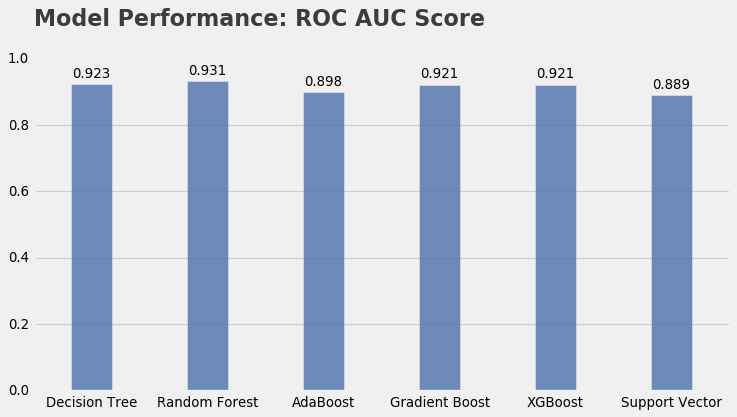

In [222]:
barplot_score('Model', 'ROC AUC Score', result1_ori, name_picture='ROCAUC_ori_os.png', color_pick=color2)

No handles with labels found to put in legend.


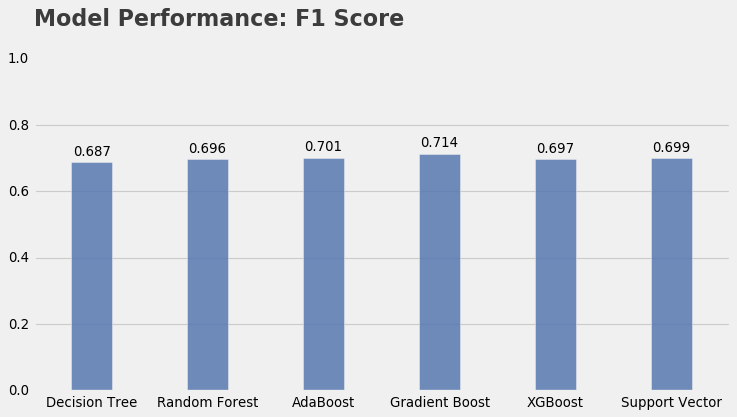

In [223]:
barplot_score('Model', 'F1 Score', result1_ori, name_picture='F1score_ori_os.png', color_pick=color2)

### [With Hyperparameter Tuning]

#### Model Training

In [208]:
#Storing performance of oversampled data in lists
model_perform1 = [[], # 0.ROCAUC Score
                  [], # 1.F1 Score
                  [], # 2.Accuracy Score
                  [], # 3.Recall Score
                  [], # 4.Precision Score
                  [[], [], [], []], # 5.Confusion Matrix: TN FP FN TP
                  [], # 6.Running Time
                  [], # 7.Best Parameter
                ]

#For train test split data
for i in enumerate(model_tune[:]):
# #    Training model for randomforest feature selection 
    run_model(i[1], X_training_rf1, X_validating_rf1, y_training1, y_validating,
                  model_perform1, model_name[i[0]])
    
# #    Using Stratified KFold Method (requiring a lot of running time)
#     run_model_kfold(i[1], X_rf_os, y_os, skfold, 
#                     model_perform1, model_name[i[0]])
    print('\n')

Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.9073836648618485
Confusion Matrix:
 [[1547  163]
 [  52  236]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.97      0.90      0.94      1710
        True       0.59      0.82      0.69       288

    accuracy                           0.89      1998
   macro avg       0.78      0.86      0.81      1998
weighted avg       0.91      0.89      0.90      1998
 



Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.9100062356754044
Confusion Matrix:
 [[1532  178]
 [  39  249]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.90      0.93      1710
        True       0.58      0.86      0.70     

#### Showing Model Performance

In [209]:
result1_tune = print_model_perf(model_name[:], model_perform1)

print('Model Evaluation for Oversampled Data + Tuned Model')
result1_tune

Model Evaluation for Oversampled Data + Tuned Model


,Model,ROC AUC Score,F1 Score,Accuracy Score,Recall Score,Precision Score,Running Time
3,Gradient Boost,0.920851,0.714992,0.913413,0.753472,0.680251,55.67
2,AdaBoost,0.898131,0.700880,0.897898,0.829861,0.606599,9.14
5,Support Vector,0.889409,0.699405,0.898899,0.815972,0.611979,21.70
4,XGBoost,0.920834,0.697368,0.907908,0.736111,0.662500,2.81
1,Random Forest,0.930641,0.696503,0.891391,0.864583,0.583138,23.31
0,Decision Tree,0.922980,0.687045,0.892392,0.819444,0.591479,0.29


In [210]:
#Confusion Matrix Result
print_confusion_matrix(model_name[:], model_perform1)

,Model,TN,FP,FN,TP
0,Decision Tree,1547,163,52,236
1,Random Forest,1532,178,39,249
2,AdaBoost,1555,155,49,239
3,Gradient Boost,1608,102,71,217
4,XGBoost,1602,108,76,212
5,Support Vector,1561,149,53,235


In [224]:
result1_tune.to_csv('result1_tune.csv')

In [90]:
# result1_tune = pd.read_csv('result1_tune.csv')
# result1_tune = result1_tune.drop(columns='Unnamed: 0')
# result1_tune = result1_tune.sort_values(by='F1 Score', ascending=False)
# result1_tune

No handles with labels found to put in legend.


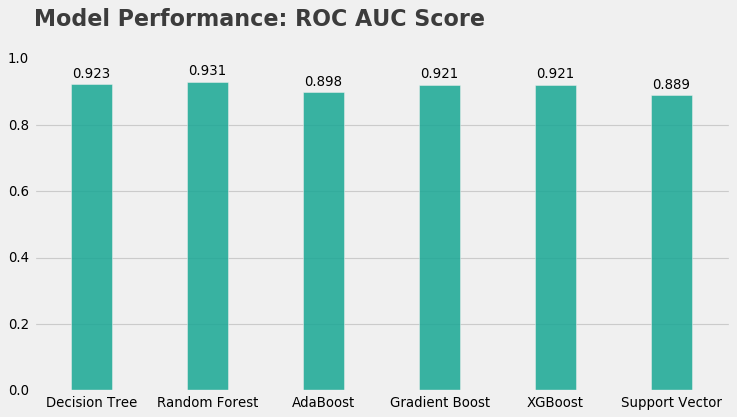

In [225]:
barplot_score('Model', 'ROC AUC Score', result1_tune, name_picture='ROCAUC_tune_os.png', color_pick=color4)

No handles with labels found to put in legend.


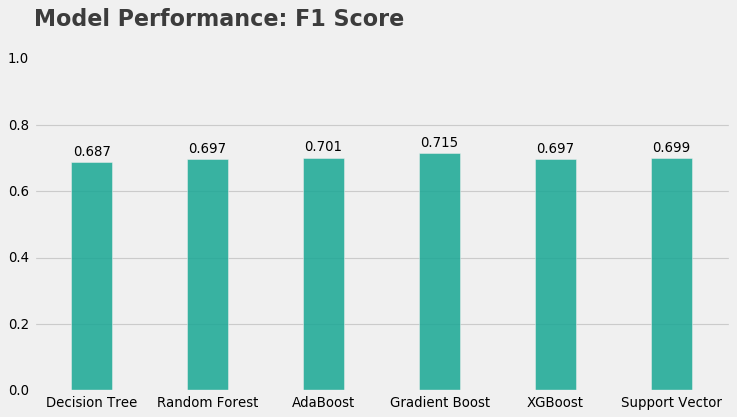

In [226]:
barplot_score('Model', 'F1 Score', result1_tune, name_picture='F1score_tune_os.png', color_pick=color4)

In [211]:
#Compiling model with best parameter obtained
model_os_dtc = model_ori[0].set_params(**model_perform1[7][0])
model_os_rf = model_ori[1].set_params(**model_perform1[7][1])
model_os_ada = model_ori[2].set_params(**model_perform1[7][2])
model_os_grb = model_ori[3].set_params(**model_perform1[7][3])
model_os_xgb = model_ori[4].set_params(**model_perform1[7][4])
model_os_svc = model_ori[5].set_params(**model_perform1[7][5])

model_os_all = [model_os_dtc,
                model_os_rf,
                model_os_ada,
                model_os_grb,
                model_os_xgb,
                model_os_svc,
               ]
model_os_name = ['model_os_dtc',
                 'model_os_rf',
                 'model_os_ada',
                 'model_os_grb',
                 'model_os_xgb',
                 'model_os_svc',
                 ]

## 4.2.2 Model Training for Undersampled Data

### [Without Hyperparameter Tuning]

In [217]:
#Storing performance of undersampled data in lists
model_perform2_ori = [[], # 0.ROCAUC Score
                      [], # 1.F1 Score
                      [], # 2.Accuracy Score
                      [], # 3.Recall Score
                      [], # 4.Precision Score
                      [[], [], [], []], # 5.Confusion Matrix: TN FP FN TP
                      [], # 6.Running Time
#                       [], # 7.Best Parameter
                     ]

#For train test split data
for i in enumerate(model_ori[:]):
#    Training model for randomforest feature selection 
    run_model_ori(i[1], X_training_rf2, X_validating_rf2, y_training2, y_validating,
                  model_perform2_ori, model_name[i[0]])
    
#   #Using Stratified KFold Method (requiring a lot of running time)
#     run_model_kfold_ori(i[1], X_rf_us, y_us, skfold, 
#                         model_perform2_ori, model_name[i[0]])
    print('\n')

For Decision Tree Model:

Confusion Matrix:
 [[1517  193]
 [  40  248]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.97      0.89      0.93      1710
        True       0.56      0.86      0.68       288

    accuracy                           0.88      1998
   macro avg       0.77      0.87      0.80      1998
weighted avg       0.91      0.88      0.89      1998
 



For Random Forest Model:

Confusion Matrix:
 [[1522  188]
 [  37  251]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.89      0.93      1710
        True       0.57      0.87      0.69       288

    accuracy                           0.89      1998
   macro avg       0.77      0.88      0.81      1998
weighted avg       0.92      0.89      0.90      1998
 



For AdaBoost Model:

Confusion Matrix:
 [[1518  192]
 [  44  244]] 

Classification Report: 
               precision    recall  f1-score   

#### Showing Model Performance

In [218]:
result2_ori = print_model_perf(model_name[:], model_perform2_ori)
result2_ori.to_csv('result2_ori.csv')
result2_ori

,Model,ROC AUC Score,F1 Score,Accuracy Score,Recall Score,Precision Score,Running Time
5,Support Vector,0.904711,0.698690,0.896396,0.833333,0.601504,0.01
1,Random Forest,0.930033,0.690509,0.887387,0.871528,0.571754,0.00
0,Decision Tree,0.913231,0.680384,0.883383,0.861111,0.562358,0.00
2,AdaBoost,0.890587,0.674033,0.881882,0.847222,0.559633,0.01
4,XGBoost,0.923523,0.669388,0.878378,0.854167,0.550336,0.00
3,Gradient Boost,0.916749,0.646597,0.864865,0.857639,0.518908,0.01


In [219]:
#Confusion Matrix Result
print_confusion_matrix(model_name[:], model_perform2_ori)

,Model,TN,FP,FN,TP
0,Decision Tree,1517,193,40,248
1,Random Forest,1522,188,37,251
2,AdaBoost,1518,192,44,244
3,Gradient Boost,1481,229,41,247
4,XGBoost,1509,201,42,246
5,Support Vector,1551,159,48,240


No handles with labels found to put in legend.


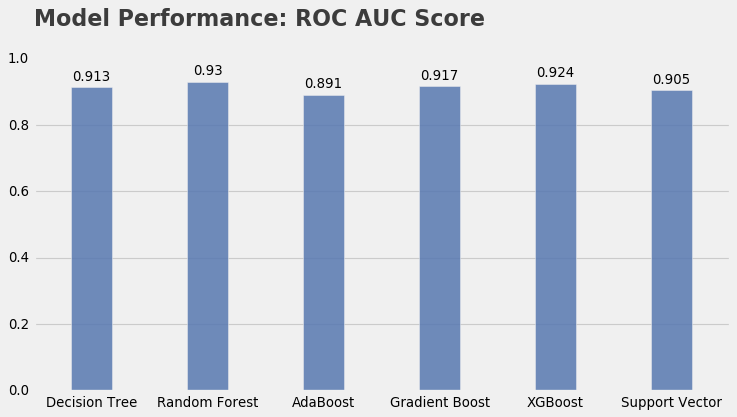

In [227]:
barplot_score('Model', 'ROC AUC Score', result2_ori, name_picture='ROCAUC_ori_us.png', color_pick=color2)

No handles with labels found to put in legend.


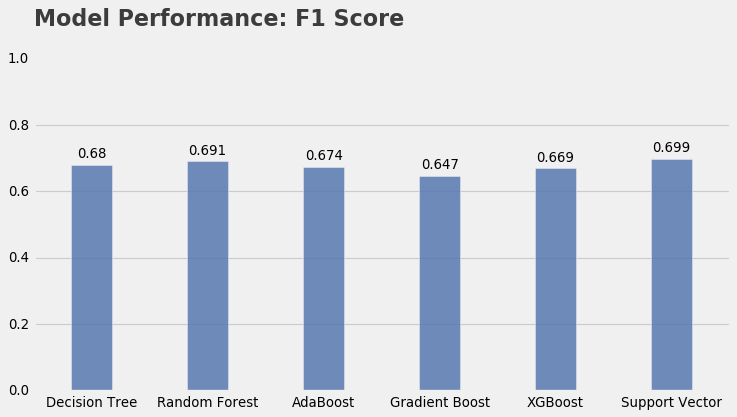

In [228]:
barplot_score('Model', 'F1 Score', result2_ori, name_picture='F1score_ori_us.png', color_pick=color2)

### [With Hyperparameter Tuning]

#### Model Training

In [212]:
#Storing performance of undersampled data in lists
model_perform2 = [[], # 0.ROCAUC Score
                  [], # 1.F1 Score
                  [], # 2.Accuracy Score
                  [], # 3.Recall Score
                  [], # 4.Precision Score
                  [[], [], [], []], # 5.Confusion Matrix: TN FP FN TP
                  [], # 6.Running Time
                  [], # 7.Best Parameter
                 ]

#For train test split data
for i in enumerate(model_tune[:]):
#    Training model for different feature selection 
#     run_model(i[1], X_training_all2[i[0]], X_validating_all2[i[0]], y_training2, y_validating,
#               model_perform2, model_name[i[0]])

#    Training model for randomforest feature selection 
    run_model(i[1], X_training_rf2, X_validating_rf2, y_training2, y_validating,
                  model_perform2, model_name[i[0]])

#   #Using Stratified KFold Method (requiring a lot of running time)
#   run_model_kfold(i[1], X_rf_us, y_us, skfold, 
#                     model_perform2, model_name[i[0]])

    print('\n')

Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score :0.8626935756421712
Confusion Matrix:
 [[1515  195]
 [  37  251]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.89      0.93      1710
        True       0.56      0.87      0.68       288

    accuracy                           0.88      1998
   macro avg       0.77      0.88      0.81      1998
weighted avg       0.92      0.88      0.89      1998
 



Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.8602786168106421
Confusion Matrix:
 [[1523  187]
 [  39  249]] 

Classification Report: 
               precision    recall  f1-score   support

       False       0.98      0.89      0.93      1710
        True       0.57      0.86      0.69       2

In [188]:
#Compiling best parameter result into a list
model_us_dtc = model_ori[0].set_params(**model_perform2[7][0])
model_us_rf  = model_ori[1].set_params(**model_perform2[7][1])
model_us_ada = model_ori[2].set_params(**model_perform2[7][2])
model_us_grb = model_ori[3].set_params(**model_perform2[7][3])
model_us_xgb = model_ori[4].set_params(**model_perform2[7][4])
model_us_svc = model_ori[5].set_params(**model_perform2[7][5])

model_us_all = [model_us_dtc,
                model_us_rf,
                model_us_ada,
                model_us_grb,
                model_us_xgb,
                model_us_svc,
                ]
model_us_name = ['model_us_dtc',
                 'model_us_rf',
                 'model_us_ada',
                 'model_us_grb',
                 'model_us_xgb',
                 'model_us_svc',
                 ]

#### Showing Model Performance

In [165]:
result2_tune = print_model_perf(model_name[:], model_perform2)

#Saving model performance result
result2_tune.to_csv('result2_tune.csv')

result2_tune

,Model,ROC AUC Score,F1 Score,Accuracy Score,Recall Score,Precision Score,Running Time
5,Support Vector,0.901701,0.691751,0.893393,0.829861,0.593052,0.10
1,Random Forest,0.930648,0.689655,0.887387,0.868056,0.572082,1.54
0,Decision Tree,0.920060,0.683924,0.883884,0.871528,0.562780,0.03
3,Gradient Boost,0.928548,0.683060,0.883884,0.868056,0.563063,6.94
2,AdaBoost,0.904123,0.680441,0.883884,0.857639,0.563927,0.43
4,XGBoost,0.930240,0.674731,0.878879,0.871528,0.550439,0.44


In [166]:
#Confusion Matrix Result
print_confusion_matrix(model_name[:], model_perform2)

,Model,TN,FP,FN,TP
0,Decision Tree,1515,195,37,251
1,Random Forest,1523,187,38,250
2,AdaBoost,1519,191,41,247
3,Gradient Boost,1516,194,38,250
4,XGBoost,1505,205,37,251
5,Support Vector,1546,164,49,239


In [167]:
# result2_tune = pd.read_csv('result2_tune.csv')
# result2_tune = result2_tune.drop(columns='Unnamed: 0')
# result2_tune = result2_tune.sort_values(by='F1 Score', ascending=False)
# result2_tune

No handles with labels found to put in legend.


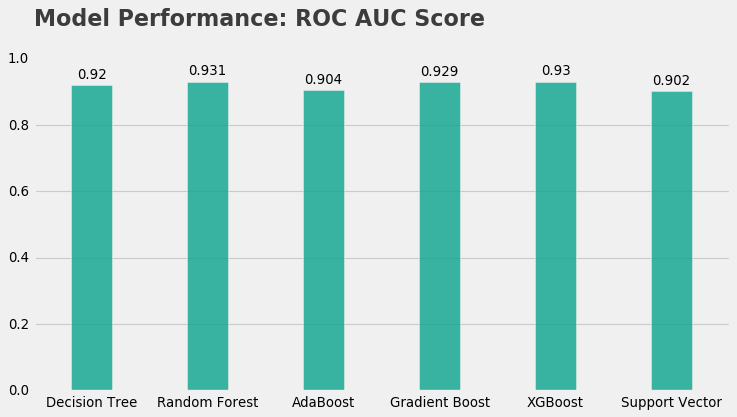

In [229]:
barplot_score('Model', 'ROC AUC Score', result2_tune, name_picture='ROCAUC_tune_us.png', color_pick=color4)

No handles with labels found to put in legend.


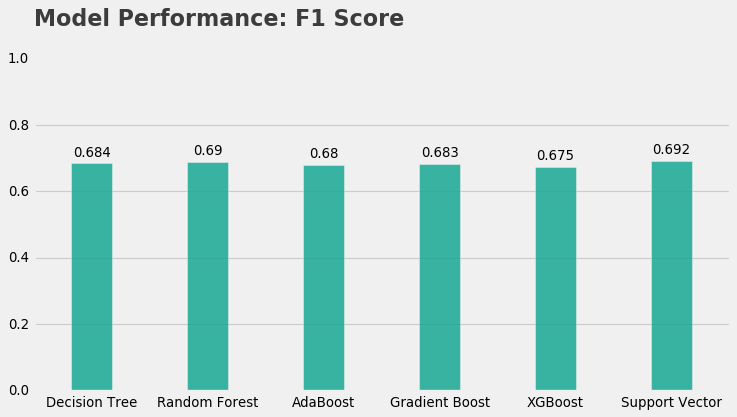

In [230]:
barplot_score('Model', 'F1 Score', result2_tune, name_picture='F1score_tune_us.png', color_pick=color4)

# 5. Predicting Test Data

In [170]:
#Scaling the test data
X_testing = feature.iloc[test_index][sel_col2]
X_testing

# X_testing_dtc = X_testing[sel_col1]
X_testing_rf = X_testing[sel_col2]
# X_testing_ada = X_testing[sel_col3]
# X_testing_grb = X_testing[sel_col4]
# X_testing_xgb = X_testing[sel_col5]
# X_testing_svc = X_testing[sel_col6]

# X_testing_all = [X_testing_dtc, X_testing_rf, X_testing_ada, X_testing_grb, X_testing_xgb, X_testing_svc]

In [172]:
validation_id = test['Id']

#### Submission File Function

In [173]:
def make_submission(clf, X_train, y_train, X_test, name_file = 'self_submission.csv'):
    start_time = timer()
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    end_time = timer()
    dev_time = round((end_time-start_time)/60,2)

    df_submit = pd.DataFrame(validation_id)
    df_submit['Revenue'] = y_pred
    df_submit['Revenue'] = df_submit['Revenue'].replace([True,False],['TRUE', 'FALSE'])
    df_submit.to_csv(name_file, index=False)

    return df_submit

In [174]:
def print_pred_perc(model_name, perc_model):
    modelprint = pd.DataFrame(model_name)
    false_print = round(pd.DataFrame(perc_model[0])*100,2) 
    true_print = round(pd.DataFrame(perc_model[1])*100,2)
    
    compare = modelprint.merge(false_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(true_print, how='outer', left_index=True, right_index=True)    
    compare.columns= ['Model', 'FALSE', 'TRUE']
    return compare

In [175]:
def perc_pred(os_tune, pred_result_false, pred_result_true):
    for i in os_tune:
        pred_result = i.value_counts(normalize=True).reset_index()
        perc_false = list(pred_result[pred_result['index']==False]['Revenue'])[0]
        perc_true = 1-perc_false #list(pred_result[pred_result['index']==True]['Revenue'])[0]
        pred_result_false.append(perc_false)
        pred_result_true.append(perc_true)

### [Untuned Model + Oversampled Data]

In [176]:
for i in enumerate(model_ori):
#     print(model_name[i[0]])
    #For train test result data
    make_submission(i[1], X_training_rf1, y_training1, X_testing_rf, name_file = 'model_ori_os'+str(i[0]+1)+'.csv')
#     print('\n')

In [177]:
os_ori_dtc = pd.read_csv('model_ori_os1.csv')['Revenue']
os_ori_rf = pd.read_csv('model_ori_os2.csv')['Revenue']
os_ori_ada = pd.read_csv('model_ori_os3.csv')['Revenue']
os_ori_grb = pd.read_csv('model_ori_os4.csv')['Revenue']
os_ori_xgb = pd.read_csv('model_ori_os5.csv')['Revenue']
os_ori_svc = pd.read_csv('model_ori_os6.csv')['Revenue']
os_ori = [os_ori_dtc, os_ori_rf, os_ori_ada, os_ori_grb, os_ori_xgb, os_ori_svc]
perc_os_ori_false = []
perc_os_ori_true = []
perc_os_ori = [perc_os_ori_false, perc_os_ori_true]

perc_pred(os_ori, perc_os_ori[0], perc_os_ori[1])
print('Prediction from Oversampled + Without Parameter Tune Model:\n')
print_pred_perc(model_name, perc_os_ori)

Prediction from Oversampled + Without Parameter Tune Model:



,Model,FALSE,TRUE
0,Decision Tree,78.02,21.98
1,Random Forest,78.02,21.98
2,AdaBoost,78.06,21.94
3,Gradient Boost,78.02,21.98
4,XGBoost,78.36,21.64
5,Support Vector,80.81,19.19


### [Tuned Model + Oversampled Data]

In [179]:
for i in enumerate(model_os_all):
#     print(model_name[i[0]])
    #For train test result data
    make_submission(i[1], X_training_rf1, y_training1, X_testing_rf, name_file = model_os_name[i[0]]+'.csv')
#     print('\n')

In [220]:
os_tune_dtc = pd.read_csv('model_os_dtc.csv')['Revenue']
os_tune_rf = pd.read_csv('model_os_rf.csv')['Revenue']
os_tune_ada = pd.read_csv('model_os_ada.csv')['Revenue']
os_tune_grb = pd.read_csv('model_os_grb.csv')['Revenue']
os_tune_xgb = pd.read_csv('model_os_xgb.csv')['Revenue']
os_tune_svc = pd.read_csv('model_os_svc.csv')['Revenue']
os_tune = [os_tune_dtc, os_tune_rf, os_tune_ada, os_tune_grb, os_tune_xgb, os_tune_svc]
perc_os_tune_false = []
perc_os_tune_true = []
perc_os_tune = [perc_os_tune_false, perc_os_tune_true]

perc_pred(os_tune, perc_os_tune[0], perc_os_tune[1])
print('Prediction from Oversampled Data + With Parameter Tune Model:\n')

print_pred_perc(model_name, perc_os_tune)

Prediction from Oversampled Data + With Parameter Tune Model:



,Model,FALSE,TRUE
0,Decision Tree,78.02,21.98
1,Random Forest,78.02,21.98
2,AdaBoost,78.06,21.94
3,Gradient Boost,79.60,20.40
4,XGBoost,78.36,21.64
5,Support Vector,80.81,19.19


### [Untuned Model + Undersampled Data]

In [182]:
for i in enumerate(model_ori):
#     print(model_name[i[0]])
    #For train test result data
    make_submission(i[1], X_training_rf2, y_training2, X_testing_rf, name_file = 'model_ori_us'+str(i[0]+1)+'.csv')

In [183]:
us_ori_dtc = pd.read_csv('model_ori_us1.csv')['Revenue']
us_ori_rf = pd.read_csv('model_ori_us2.csv')['Revenue']
us_ori_ada = pd.read_csv('model_ori_us3.csv')['Revenue']
us_ori_grb = pd.read_csv('model_ori_us4.csv')['Revenue']
us_ori_xgb = pd.read_csv('model_ori_us5.csv')['Revenue']
us_ori_svc = pd.read_csv('model_ori_us6.csv')['Revenue']
us_ori = [us_ori_dtc, us_ori_rf, us_ori_ada, us_ori_grb, us_ori_xgb, us_ori_svc]
perc_us_ori_false = []
perc_us_ori_true = []
perc_us_ori = [perc_us_ori_false, perc_us_ori_true]

perc_pred(us_ori, perc_us_ori[0], perc_us_ori[1])
print_pred_perc(model_name, perc_us_ori)

,Model,FALSE,TRUE
0,Decision Tree,77.76,22.24
1,Random Forest,78.02,21.98
2,AdaBoost,78.06,21.94
3,Gradient Boost,77.80,22.20
4,XGBoost,76.86,23.14
5,Support Vector,78.10,21.90


### [Tuned Model + Undersampled Data]

In [185]:
for i in enumerate(model_us_all):
#     print(model_name[i[0]])
    make_submission(i[1], X_training_rf2, y_training2, X_testing_rf, name_file = model_us_name[i[0]]+'.csv')
#     print('\n')

In [186]:
us_tune_dtc = pd.read_csv('model_us_dtc.csv')['Revenue']
us_tune_rf = pd.read_csv('model_us_rf.csv')['Revenue']
us_tune_ada = pd.read_csv('model_us_ada.csv')['Revenue']
us_tune_grb = pd.read_csv('model_us_grb.csv')['Revenue']
us_tune_xgb = pd.read_csv('model_us_xgb.csv')['Revenue']
us_tune_svc = pd.read_csv('model_us_svc.csv')['Revenue']
us_tune = [us_tune_dtc, us_tune_rf, us_tune_ada, us_tune_grb, us_tune_xgb, us_tune_svc]
perc_us_tune_false = []
perc_us_tune_true = []
perc_us_tune = [perc_us_tune_false, perc_us_tune_true]

perc_pred(us_tune, perc_us_tune[0], perc_us_tune[1])
print_pred_perc(model_name, perc_us_tune)

,Model,FALSE,TRUE
0,Decision Tree,77.76,22.24
1,Random Forest,78.10,21.90
2,AdaBoost,78.06,21.94
3,Gradient Boost,77.80,22.20
4,XGBoost,76.86,23.14
5,Support Vector,78.10,21.90


## Conclusions

- Hyperparameter optimization method slightly improves the model performance result
- Gradientboost classifier gives best model performance so far
- Model trained with oversampled data tend to learn the data with Revenue == False better meanwhile the model trained with undersample data tend to learn the data with Revenue == True better. It can be seen that for oversampled data model, there are relatively more FP and less FN then the model trained by undersampled data.
- To avoid overfitting, we can using only several highly important features.
- Since the accuracy score are relatively high, and the precision score are relatively medium good (the precison result for the data with Revenue==True), more feature needed to increase the model complexity so the precision for the profitable visitor would be increased.